___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Importing plotly and cufflinks in offline mode
import plotly.express as px
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.warn("this will not show")

# Figure & Display options
plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
import matplotlib.colors as mcolors
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [154]:
import tensorflow as tf
import warnings

warnings.filterwarnings('ignore', category=UserWarning, module='tensorflow')

In [14]:
df0 = pd.read_csv('Churn_Modelling.csv')

In [15]:
df = df0.copy()

In [16]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [18]:
df.shape

(10000, 14)

In [19]:
df.duplicated().sum()

0

In [20]:
def first_looking(df, col):
    """
    Prints basic information about a column in a Pandas DataFrame.

    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame to analyze.
    col : str
        The name of the column to analyze.

    Returns:
    --------
    None.

    Prints:
    -------
    column name    : str
        The name of the column being analyzed.
    per_of_nulls   : float
        The percentage of null values in the column.
    num_of_nulls   : int
        The number of null values in the column.
    num_of_uniques : int
        The number of unique values in the column.
    shape_of_df    : tuple
        The shape of the DataFrame.
    The unique values in the column and their frequency of occurrence.
    """
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum() * 100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].astype(str).nunique())
    print("shape_of_df    : ", df.shape)
    print("--------------------------------")
    print(df[col].value_counts(dropna=False))

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.00,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
CustomerId,10000.00,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
CreditScore,10000.00,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.00,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.00,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.00,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.00,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.00,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.00,100090.24,57510.49,11.58,51002.11,100193.91,149388.25,199992.48


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

# RowNumber

In [22]:
first_looking(df, 'RowNumber')

column name    :  RowNumber
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  10000
shape_of_df    :  (10000, 14)
--------------------------------
RowNumber
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: count, Length: 10000, dtype: int64


In [23]:
df.drop(columns= 'RowNumber', axis = 1, inplace = True)

# CustomerId

In [24]:
first_looking(df, 'CustomerId')

column name    :  CustomerId
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  10000
shape_of_df    :  (10000, 13)
--------------------------------
CustomerId
15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: count, Length: 10000, dtype: int64


In [25]:
df.drop(columns = 'CustomerId', axis = 1 , inplace = True)

# CreditScore

In [26]:
first_looking(df, 'CreditScore')

column name    :  CreditScore
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  460
shape_of_df    :  (10000, 12)
--------------------------------
CreditScore
850    233
678     63
655     54
705     53
667     53
684     52
670     50
651     50
683     48
652     48
648     48
660     48
682     47
663     47
640     47
637     46
714     45
686     45
710     45
645     45
633     45
687     45
679     45
706     44
627     44
646     44
619     44
584     43
625     43
628     43
608     43
613     42
635     42
632     42
701     41
554     41
712     41
698     41
601     40
699     40
597     40
634     40
606     40
680     40
644     39
711     39
681     39
656     39
592     38
593     38
659     38
718     38
611     38
630     38
666     38
696     38
641     38
581     38
605     37
675     37
695     37
624     37
629     37
614     37
579     37
653     37
662     37
616     37
639     37
650     37
642     37
724     37
607 

In [27]:
credit_score_counts = df['CreditScore'].value_counts()


low_frequency_scores = credit_score_counts[credit_score_counts < 10]


print(low_frequency_scores)

CreditScore
833    9
430    9
817    9
522    9
480    9
474    9
486    9
470    9
465    9
821    8
829    8
476    8
443    8
825    8
849    8
473    8
838    8
837    8
820    8
804    8
461    8
495    8
472    8
824    7
464    7
823    7
478    7
483    7
457    7
826    7
842    7
844    7
458    7
439    7
469    7
471    7
801    7
845    6
453    6
437    6
810    6
831    6
475    6
449    6
847    6
418    6
832    6
444    6
816    6
482    6
434    6
438    6
819    6
427    6
818    6
431    5
446    5
451    5
459    5
456    5
435    5
822    5
432    5
350    5
827    5
836    5
846    5
848    5
840    5
429    4
447    4
422    4
460    4
450    4
462    4
463    4
455    4
467    4
425    4
416    4
411    4
454    4
428    3
433    3
420    3
410    3
415    3
839    3
421    3
413    3
405    2
408    2
426    2
448    2
436    2
414    2
376    2
843    2
830    2
395    1
373    1
382    1
412    1
367    1
441    1
359    1
424    1
442    1
399    1
363    

In [28]:
indices_to_drop = df[df['CreditScore'].isin(low_frequency_scores)].index

In [29]:
df.drop(index = indices_to_drop, inplace = True)

<Axes: xlabel='CreditScore', ylabel='Count'>

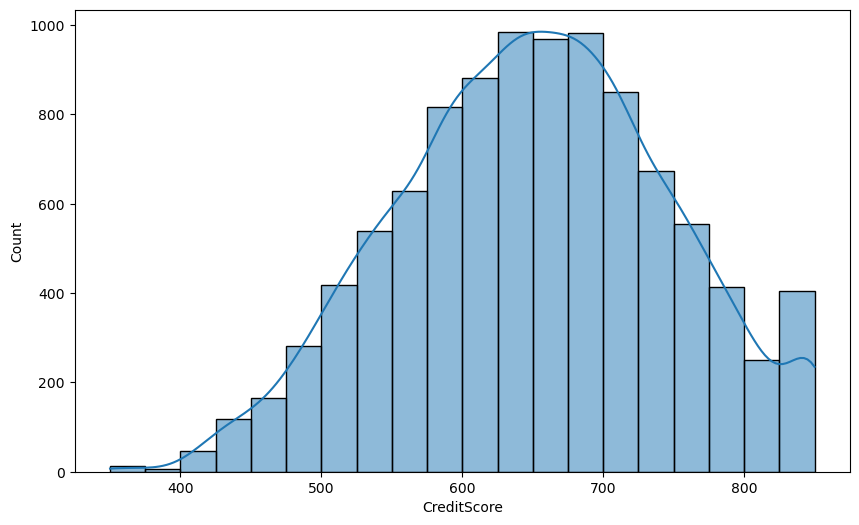

In [30]:
sns.histplot(df, x = 'CreditScore', bins = 20, kde = True)


<Axes: xlabel='CreditScore'>

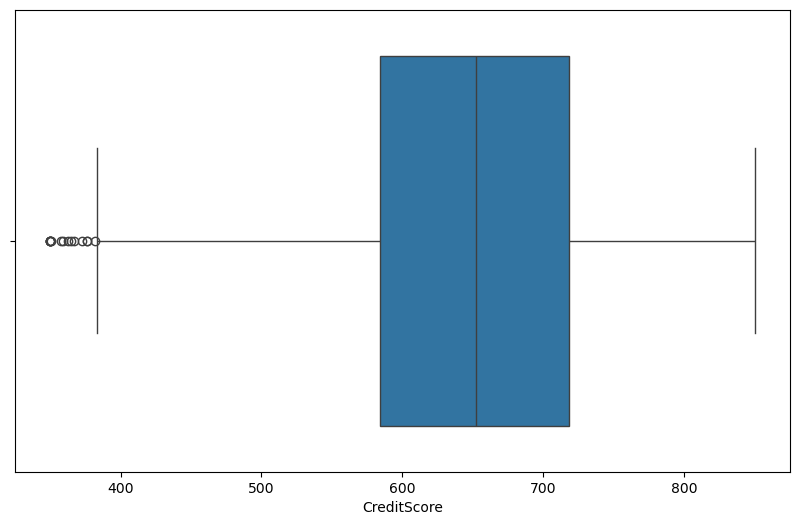

In [31]:
sns.boxplot(df, x = 'CreditScore')

In [32]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu').format('{:.2f}')

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.00,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.00,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.00,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.00,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.00,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.00,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.00,100090.24,57510.49,11.58,51002.11,100193.91,149388.25,199992.48
Exited,10000.00,0.20,0.40,0.00,0.00,0.00,0.00,1.00


In [33]:
df.drop(columns= 'Surname', axis = 1 , inplace = True)

In [34]:
df.describe(include=object).T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [35]:
df.nunique()


CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

# Geography

In [36]:
first_looking(df, 'Geography')

column name    :  Geography
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  3
shape_of_df    :  (10000, 11)
--------------------------------
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


In [37]:
df["Geography"].value_counts(normalize = True) * 100

Geography
France    50.14
Germany   25.09
Spain     24.77
Name: proportion, dtype: float64

<Axes: ylabel='Geography'>

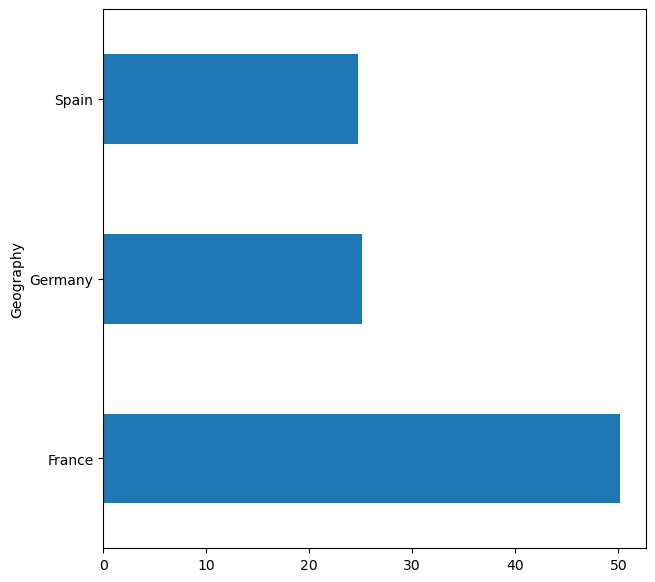

In [38]:
(df["Geography"].value_counts(normalize = True)*100).plot(kind="barh", figsize=(7,7))

# Gender

In [39]:
first_looking(df, 'Gender')

column name    :  Gender
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
shape_of_df    :  (10000, 11)
--------------------------------
Gender
Male      5457
Female    4543
Name: count, dtype: int64


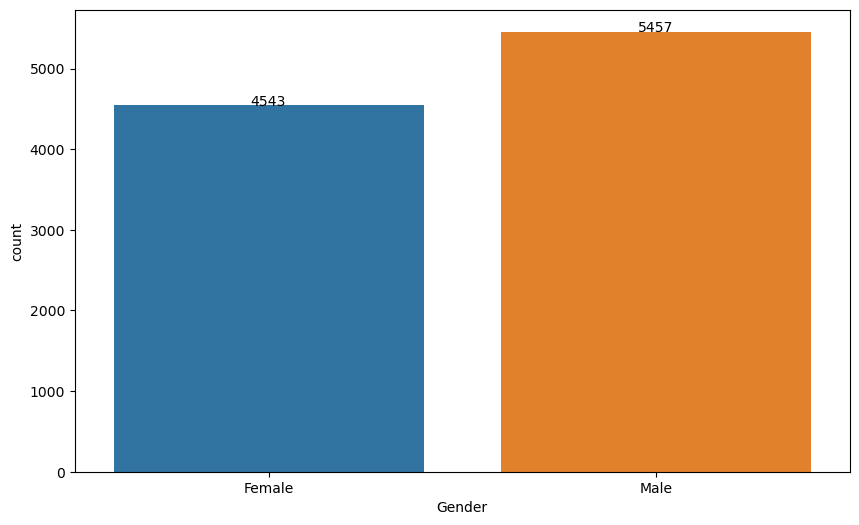

In [40]:
sns.countplot(df, x = 'Gender',palette = 'tab10')

gender_counts = df['Gender'].value_counts(sort = False)


for index, value in enumerate(gender_counts):
    plt.text(index, value, str(value), ha='center');

In [41]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

# NumOfProducts

In [42]:
first_looking(df, 'NumOfProducts')

column name    :  NumOfProducts
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  4
shape_of_df    :  (10000, 11)
--------------------------------
NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64


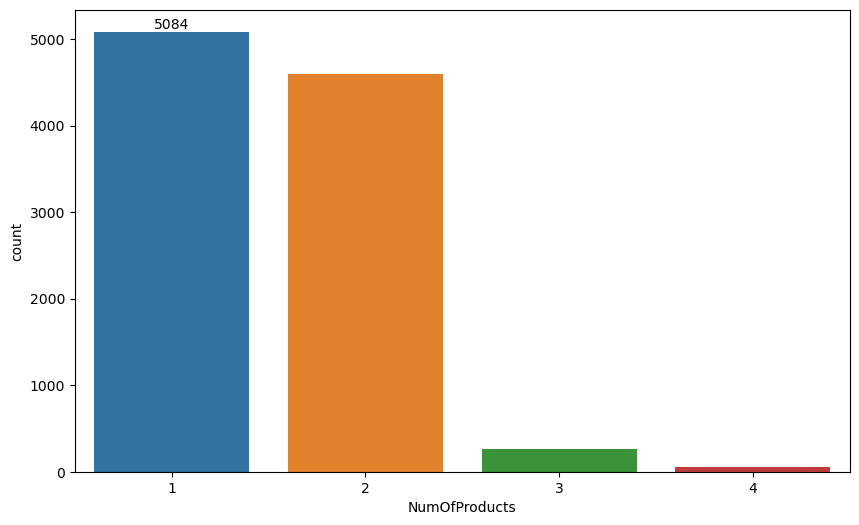

In [43]:
ax = sns.countplot(x=df["NumOfProducts"], palette = 'tab10')
ax.bar_label(ax.containers[0]);


<Axes: ylabel='Gender,NumOfProducts'>

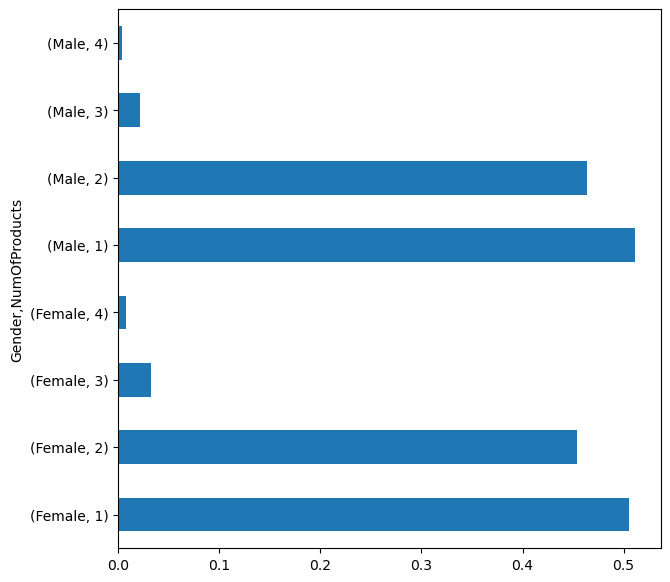

In [44]:
df.groupby(["Gender"])["NumOfProducts"].value_counts(normalize = True).plot(kind="barh", figsize=(7,7))

<Axes: ylabel='Geography,NumOfProducts'>

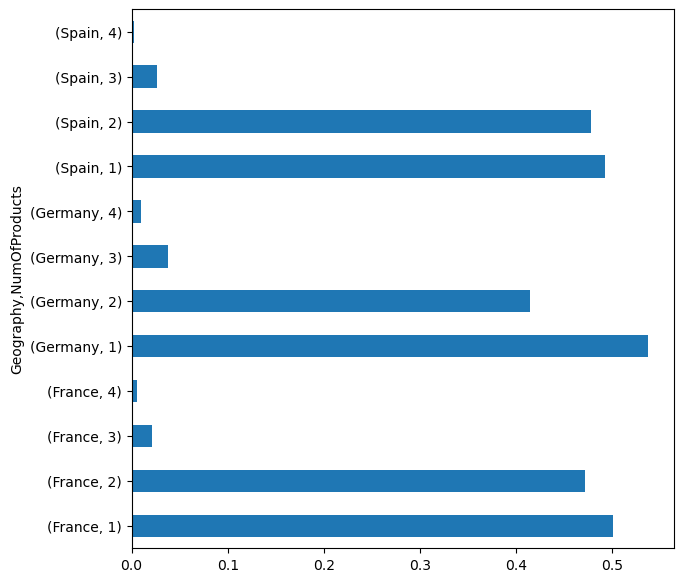

In [45]:
df.groupby(["Geography"])["NumOfProducts"].value_counts(normalize = True).plot(kind="barh", figsize=(7,7))

<Figure size 400x600 with 0 Axes>

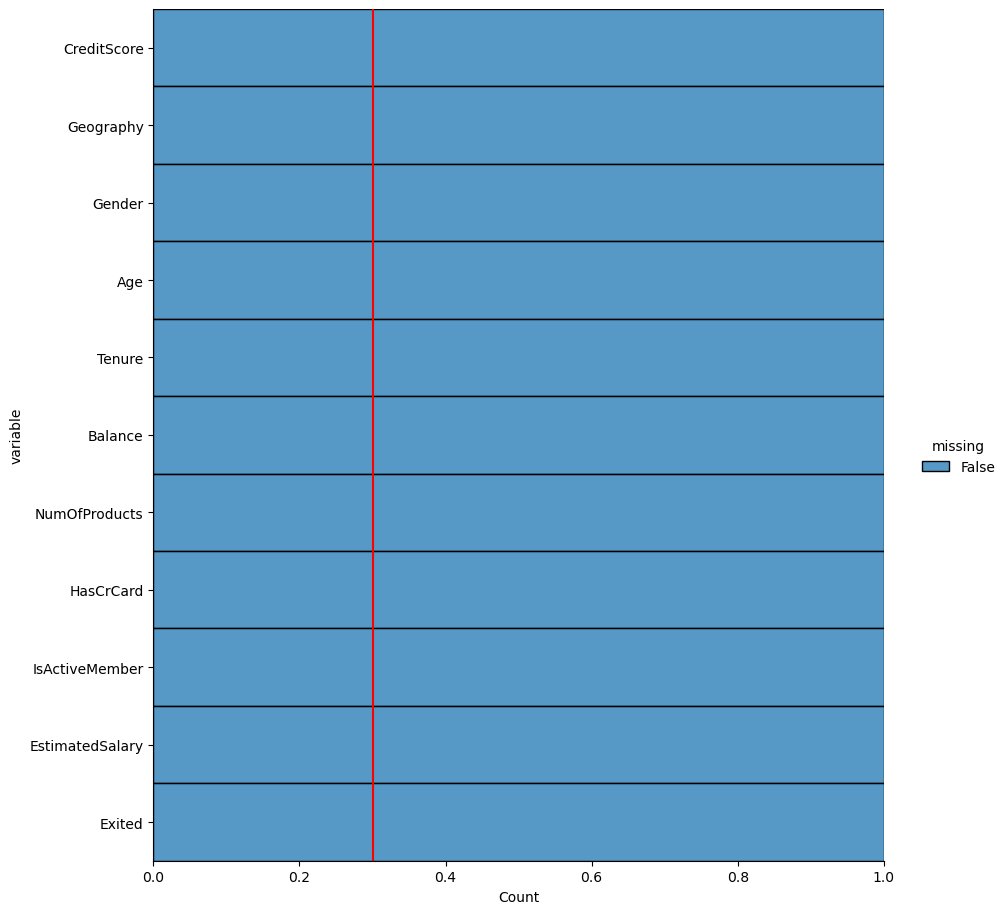

In [46]:
plt.figure(figsize=(4, 6))

sns.displot(data=df.isnull().melt(value_name="missing"),
            y="variable",
            hue="missing",
            multiple="fill",
            height=9.25)

plt.axvline(0.3, color="r");

# Exited

In [47]:
first_looking(df, 'Exited')

column name    :  Exited
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  2
shape_of_df    :  (10000, 11)
--------------------------------
Exited
0    7963
1    2037
Name: count, dtype: int64


Percentage of "being churn": % 20.37 --> (2037 churn cases out of 10000)
Percentage of "NOT being churn": % 79.63 --> (7963 NOT churn cases out of 10000)


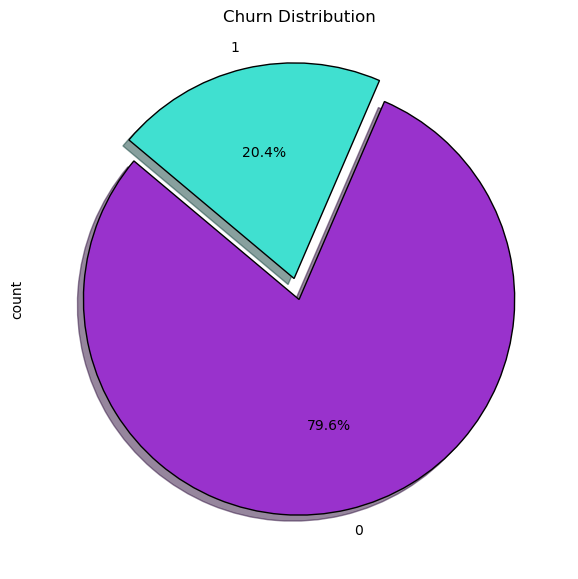

In [48]:
y = df['Exited']

print(f'Percentage of \033[1m"being churn"\033[0m: % {round(y.value_counts(normalize=True)[1]*100,2)} --> \
({y.value_counts()[1]} churn cases out of {len(df)})\nPercentage of \033[1m"NOT being churn"\033[0m: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} NOT churn cases out of {len(df)})')

explode = [0, 0.1]

df["Exited"].value_counts().plot(kind="pie",
                                 autopct='%1.1f%%',
                                 figsize=(7, 7),
                                 explode=explode,
                                 wedgeprops={'edgecolor': 'black'},
                                 shadow=True,
                                 colors = ['darkorchid', 'turquoise'],
                                 startangle=140)
plt.title('Churn Distribution');

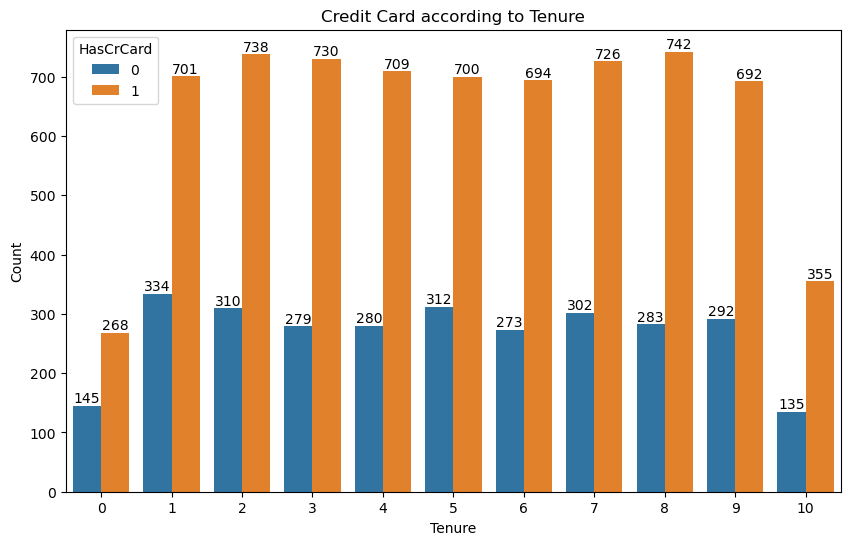

In [49]:
plt.title("Credit Card according to Tenure")
plt.ylabel("Count")
ax =sns.countplot(x=df.Tenure, hue=df.HasCrCard)
for p in ax.containers:
    ax.bar_label(p)

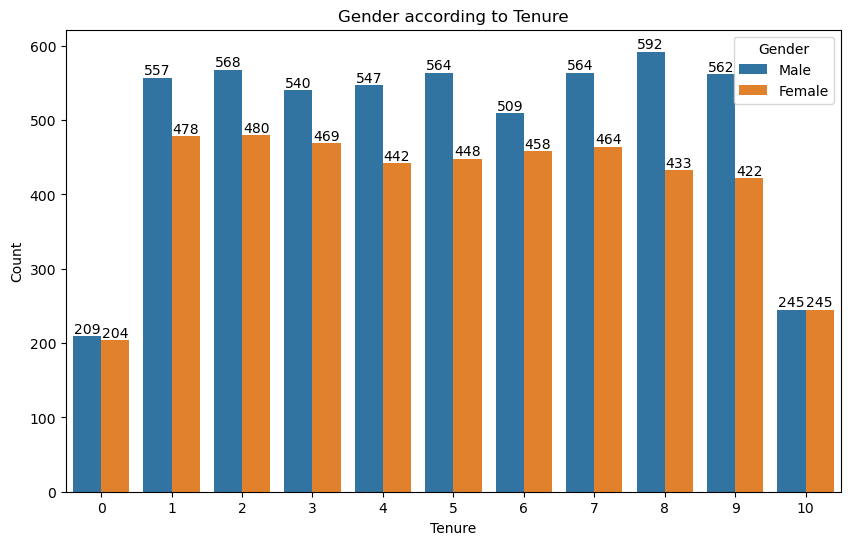

In [50]:
plt.title("Gender according to Tenure")
plt.ylabel("Count")
ax =sns.countplot(x=df.Tenure, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)

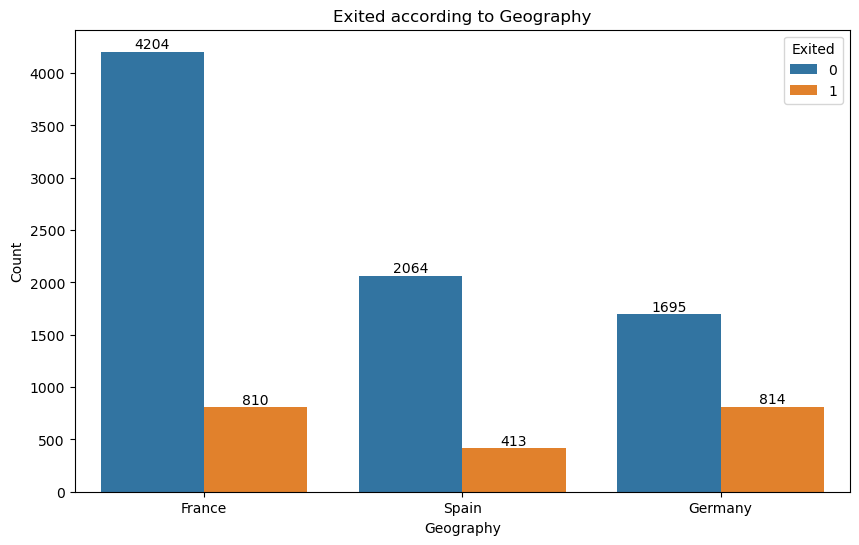

In [51]:
plt.title("Exited according to Geography")
plt.ylabel("Count")
ax =sns.countplot(x=df.Geography, hue=df.Exited)
for p in ax.containers:
    ax.bar_label(p)

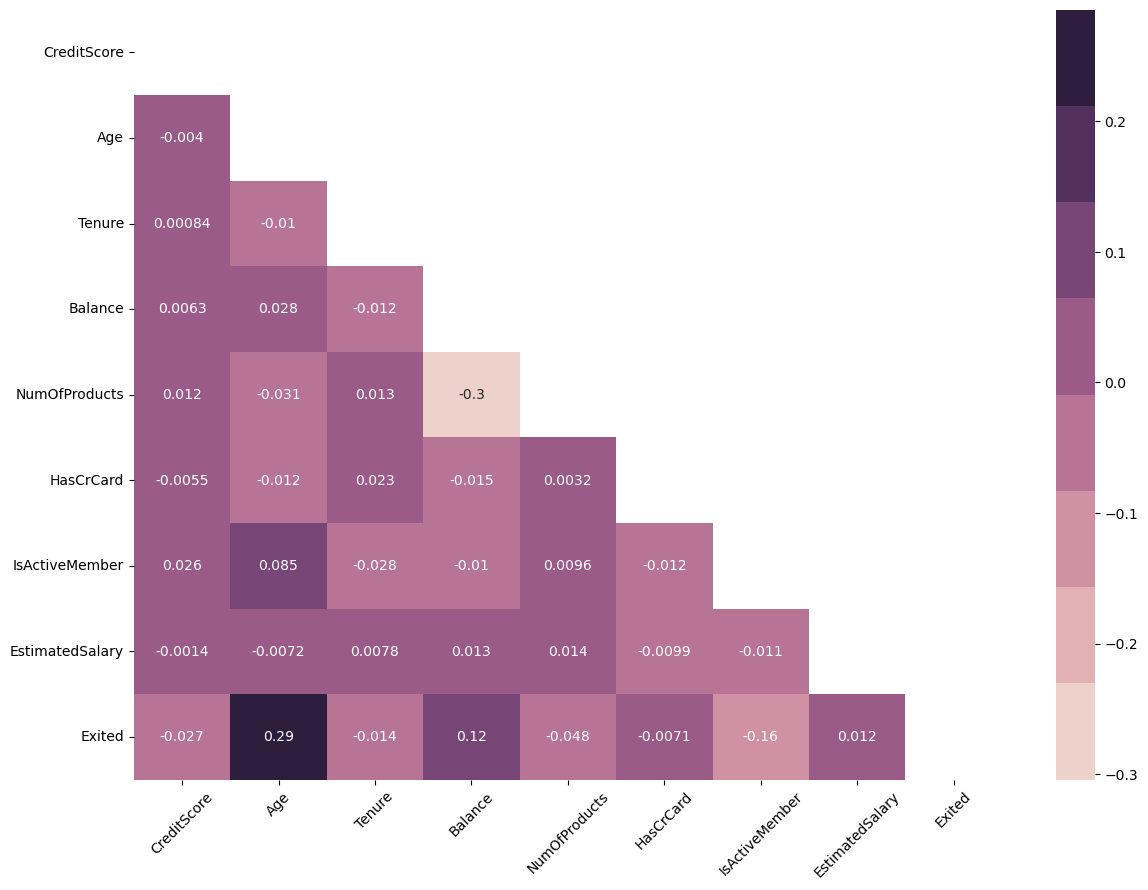

In [52]:
plt.figure(figsize=(14, 10))

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(df.corr( numeric_only = True))

# using the upper triangle matrix as mask
sns.heatmap(df.corr( numeric_only = True), annot=True, cmap = sns.cubehelix_palette(8), mask=matrix)

plt.xticks(rotation=45);

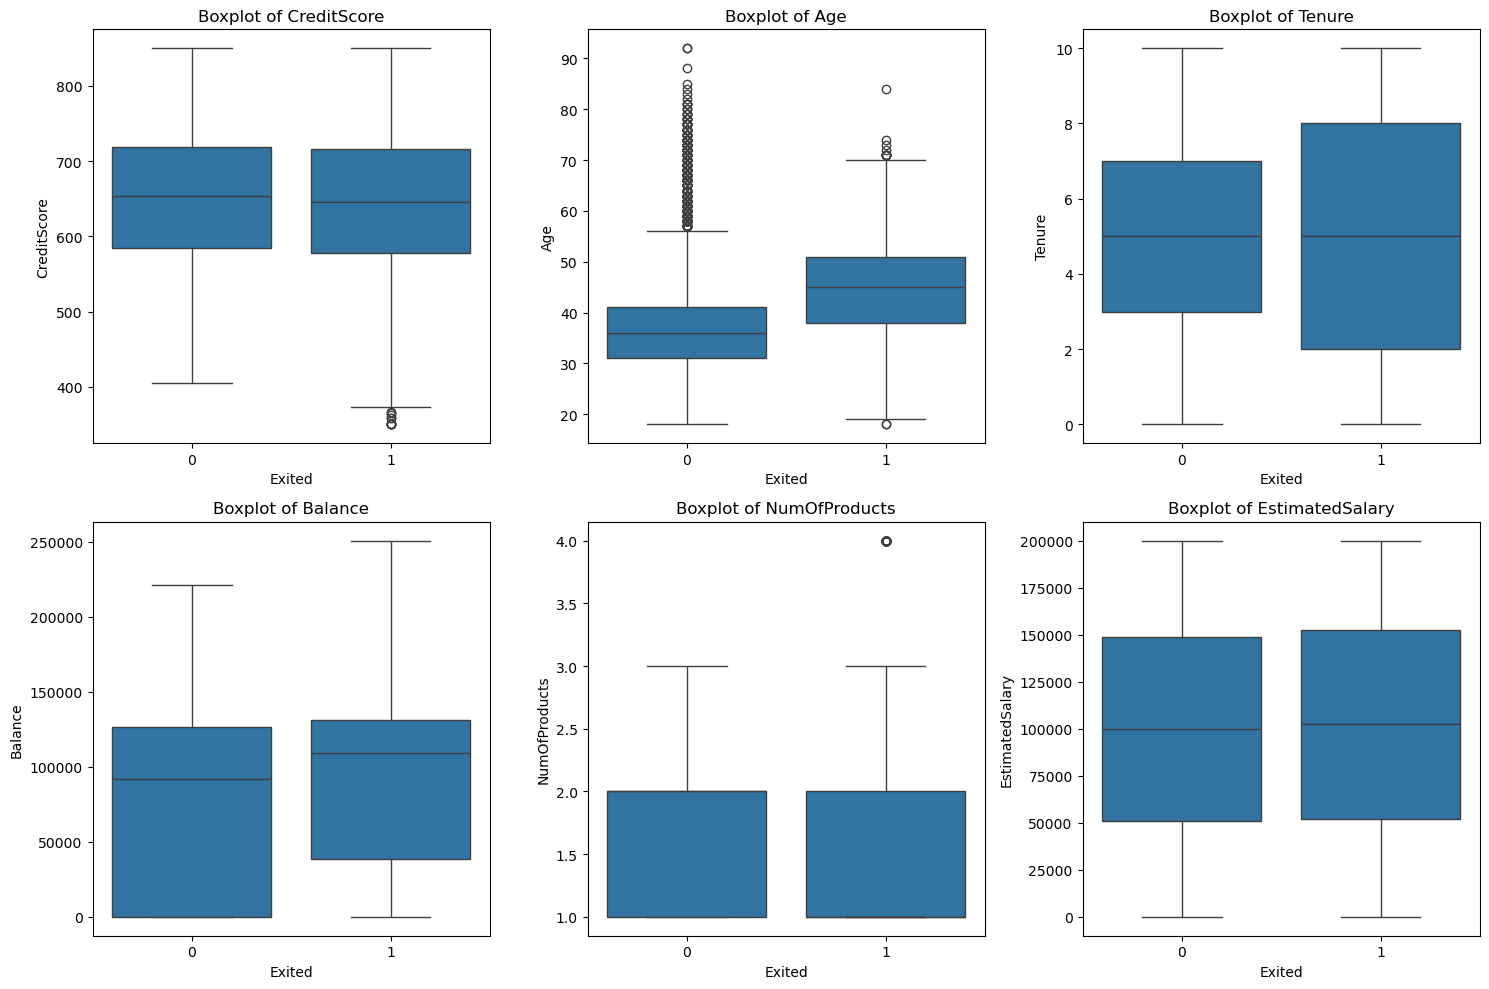

In [53]:
numeric_columns = df.select_dtypes(include=['number']).drop(columns=['Exited', 'HasCrCard', 'IsActiveMember'])

ncols = 3
num_plots = len(numeric_columns.columns)
nrows = (num_plots - 1) // ncols + 1

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))

for i, column in enumerate(numeric_columns.columns):
    row = i // ncols
    col = i % ncols
    sns.boxplot(data=df, x='Exited', y=column, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {column}')

for i in range(num_plots, nrows * ncols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [54]:
df.select_dtypes(include=['object']).columns

Index(['Geography', 'Gender'], dtype='object')

In [55]:
cat_columns = df.select_dtypes(include=['object']).columns

df = pd.get_dummies(df, columns=cat_columns)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  bool   
 10  Geography_Germany  10000 non-null  bool   
 11  Geography_Spain    10000 non-null  bool   
 12  Gender_Female      10000 non-null  bool   
 13  Gender_Male        10000 non-null  bool   
dtypes: bool(5), float64(2), int64(7)
memory usage: 752.1 KB


# Preprocessing of Data
- Train | Test Split, Scalling

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [58]:
X = df.drop("Exited", axis = 1)
y = df["Exited"]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y , random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, stratify = y_train, random_state = 42)

In [60]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, PrecisionRecallDisplay

In [62]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight

In [63]:
X_train.shape

(6400, 13)

In [64]:
X_val.shape

(1600, 13)

In [65]:
X_test.shape

(2000, 13)

In [66]:
model = Sequential()

model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 36)                504       
_________________________________________________________________
dense_1 (Dense)              (None, 18)                666       
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 171       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 10        
Total params: 1,351
Trainable params: 1,351
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=500,

)

Epoch 1/500
100/100 [==============================] - 0s 3ms/step - loss: 0.5580 - recall: 0.0307 - val_loss: 0.4938 - val_recall: 0.0000e+00
Epoch 2/500
100/100 [==============================] - 0s 767us/step - loss: 0.4760 - recall: 7.6687e-04 - val_loss: 0.4647 - val_recall: 0.0061
Epoch 3/500
100/100 [==============================] - 0s 829us/step - loss: 0.4606 - recall: 0.0483 - val_loss: 0.4523 - val_recall: 0.0491
Epoch 4/500
100/100 [==============================] - 0s 832us/step - loss: 0.4474 - recall: 0.1074 - val_loss: 0.4396 - val_recall: 0.1411
Epoch 5/500
100/100 [==============================] - 0s 817us/step - loss: 0.4327 - recall: 0.1449 - val_loss: 0.4251 - val_recall: 0.2301
Epoch 6/500
100/100 [==============================] - 0s 870us/step - loss: 0.4208 - recall: 0.2071 - val_loss: 0.4165 - val_recall: 0.2791
Epoch 7/500
100/100 [==============================] - 0s 866us/step - loss: 0.4078 - recall: 0.2515 - val_loss: 0.4026 - val_recall: 0.2423
Epoch 8

Epoch 59/500
100/100 [==============================] - 0s 781us/step - loss: 0.3214 - recall: 0.4969 - val_loss: 0.3502 - val_recall: 0.4387
Epoch 60/500
100/100 [==============================] - 0s 763us/step - loss: 0.3215 - recall: 0.4908 - val_loss: 0.3518 - val_recall: 0.3988
Epoch 61/500
100/100 [==============================] - 0s 782us/step - loss: 0.3211 - recall: 0.4939 - val_loss: 0.3602 - val_recall: 0.3865
Epoch 62/500
100/100 [==============================] - 0s 779us/step - loss: 0.3209 - recall: 0.4946 - val_loss: 0.3550 - val_recall: 0.4785
Epoch 63/500
100/100 [==============================] - 0s 809us/step - loss: 0.3188 - recall: 0.5069 - val_loss: 0.3549 - val_recall: 0.4571
Epoch 64/500
100/100 [==============================] - 0s 757us/step - loss: 0.3219 - recall: 0.4870 - val_loss: 0.3497 - val_recall: 0.4847
Epoch 65/500
100/100 [==============================] - 0s 806us/step - loss: 0.3204 - recall: 0.4954 - val_loss: 0.3503 - val_recall: 0.4847
Epoch 

100/100 [==============================] - 0s 955us/step - loss: 0.3104 - recall: 0.5092 - val_loss: 0.3631 - val_recall: 0.3742
Epoch 117/500
100/100 [==============================] - 0s 889us/step - loss: 0.3112 - recall: 0.5138 - val_loss: 0.3660 - val_recall: 0.3834
Epoch 118/500
100/100 [==============================] - 0s 909us/step - loss: 0.3115 - recall: 0.5176 - val_loss: 0.3654 - val_recall: 0.4571
Epoch 119/500
100/100 [==============================] - 0s 931us/step - loss: 0.3117 - recall: 0.5222 - val_loss: 0.3728 - val_recall: 0.4724
Epoch 120/500
100/100 [==============================] - 0s 973us/step - loss: 0.3108 - recall: 0.5077 - val_loss: 0.3599 - val_recall: 0.4448
Epoch 121/500
100/100 [==============================] - 0s 954us/step - loss: 0.3111 - recall: 0.5146 - val_loss: 0.3589 - val_recall: 0.4294
Epoch 122/500
100/100 [==============================] - 0s 889us/step - loss: 0.3118 - recall: 0.5084 - val_loss: 0.3584 - val_recall: 0.4509
Epoch 123/500

100/100 [==============================] - 0s 799us/step - loss: 0.3058 - recall: 0.5015 - val_loss: 0.3626 - val_recall: 0.4417
Epoch 174/500
100/100 [==============================] - 0s 778us/step - loss: 0.3031 - recall: 0.5230 - val_loss: 0.3664 - val_recall: 0.4755
Epoch 175/500
100/100 [==============================] - 0s 798us/step - loss: 0.3028 - recall: 0.5153 - val_loss: 0.3687 - val_recall: 0.4356
Epoch 176/500
100/100 [==============================] - 0s 777us/step - loss: 0.3036 - recall: 0.5130 - val_loss: 0.3744 - val_recall: 0.5123
Epoch 177/500
100/100 [==============================] - 0s 798us/step - loss: 0.3027 - recall: 0.5207 - val_loss: 0.3681 - val_recall: 0.3988
Epoch 178/500
100/100 [==============================] - 0s 789us/step - loss: 0.3031 - recall: 0.5261 - val_loss: 0.3800 - val_recall: 0.4601
Epoch 179/500
100/100 [==============================] - 0s 796us/step - loss: 0.3039 - recall: 0.5192 - val_loss: 0.3644 - val_recall: 0.4479
Epoch 180/500

100/100 [==============================] - 0s 795us/step - loss: 0.2956 - recall: 0.5238 - val_loss: 0.3780 - val_recall: 0.4325
Epoch 231/500
100/100 [==============================] - 0s 779us/step - loss: 0.2960 - recall: 0.5353 - val_loss: 0.3707 - val_recall: 0.4264
Epoch 232/500
100/100 [==============================] - 0s 783us/step - loss: 0.2978 - recall: 0.5192 - val_loss: 0.3731 - val_recall: 0.4233
Epoch 233/500
100/100 [==============================] - 0s 782us/step - loss: 0.2953 - recall: 0.5307 - val_loss: 0.3771 - val_recall: 0.4172
Epoch 234/500
100/100 [==============================] - 0s 802us/step - loss: 0.2949 - recall: 0.5368 - val_loss: 0.3894 - val_recall: 0.4724
Epoch 235/500
100/100 [==============================] - 0s 783us/step - loss: 0.2961 - recall: 0.5314 - val_loss: 0.3712 - val_recall: 0.4448
Epoch 236/500
100/100 [==============================] - 0s 788us/step - loss: 0.2947 - recall: 0.5253 - val_loss: 0.3856 - val_recall: 0.4325
Epoch 237/500

100/100 [==============================] - 0s 912us/step - loss: 0.2889 - recall: 0.5399 - val_loss: 0.3899 - val_recall: 0.4172
Epoch 288/500
100/100 [==============================] - 0s 805us/step - loss: 0.2866 - recall: 0.5376 - val_loss: 0.3877 - val_recall: 0.4417
Epoch 289/500
100/100 [==============================] - 0s 776us/step - loss: 0.2896 - recall: 0.5406 - val_loss: 0.3949 - val_recall: 0.3681
Epoch 290/500
100/100 [==============================] - 0s 814us/step - loss: 0.2880 - recall: 0.5368 - val_loss: 0.3927 - val_recall: 0.3834
Epoch 291/500
100/100 [==============================] - 0s 828us/step - loss: 0.2877 - recall: 0.5345 - val_loss: 0.3884 - val_recall: 0.4356
Epoch 292/500
100/100 [==============================] - 0s 787us/step - loss: 0.2862 - recall: 0.5491 - val_loss: 0.3868 - val_recall: 0.4049
Epoch 293/500
100/100 [==============================] - 0s 900us/step - loss: 0.2845 - recall: 0.5437 - val_loss: 0.3951 - val_recall: 0.4785
Epoch 294/500

100/100 [==============================] - 0s 982us/step - loss: 0.2817 - recall: 0.5544 - val_loss: 0.3978 - val_recall: 0.4141
Epoch 345/500
100/100 [==============================] - 0s 781us/step - loss: 0.2817 - recall: 0.5606 - val_loss: 0.4078 - val_recall: 0.3558
Epoch 346/500
100/100 [==============================] - 0s 804us/step - loss: 0.2828 - recall: 0.5498 - val_loss: 0.4050 - val_recall: 0.4387
Epoch 347/500
100/100 [==============================] - 0s 801us/step - loss: 0.2823 - recall: 0.5506 - val_loss: 0.4054 - val_recall: 0.3466
Epoch 348/500
100/100 [==============================] - 0s 783us/step - loss: 0.2799 - recall: 0.5575 - val_loss: 0.4011 - val_recall: 0.4356
Epoch 349/500
100/100 [==============================] - 0s 784us/step - loss: 0.2791 - recall: 0.5644 - val_loss: 0.3979 - val_recall: 0.3957
Epoch 350/500
100/100 [==============================] - 0s 798us/step - loss: 0.2794 - recall: 0.5560 - val_loss: 0.4066 - val_recall: 0.4939
Epoch 351/500

100/100 [==============================] - 0s 793us/step - loss: 0.2737 - recall: 0.5821 - val_loss: 0.4106 - val_recall: 0.4325
Epoch 402/500
100/100 [==============================] - 0s 830us/step - loss: 0.2726 - recall: 0.5690 - val_loss: 0.4129 - val_recall: 0.4939
Epoch 403/500
100/100 [==============================] - 0s 798us/step - loss: 0.2763 - recall: 0.5798 - val_loss: 0.4205 - val_recall: 0.4509
Epoch 404/500
100/100 [==============================] - 0s 799us/step - loss: 0.2717 - recall: 0.5836 - val_loss: 0.4187 - val_recall: 0.4847
Epoch 405/500
100/100 [==============================] - 0s 963us/step - loss: 0.2721 - recall: 0.5798 - val_loss: 0.4224 - val_recall: 0.4417
Epoch 406/500
100/100 [==============================] - 0s 863us/step - loss: 0.2698 - recall: 0.5721 - val_loss: 0.4322 - val_recall: 0.4049
Epoch 407/500
100/100 [==============================] - 0s 811us/step - loss: 0.2720 - recall: 0.5752 - val_loss: 0.4212 - val_recall: 0.4663
Epoch 408/500

100/100 [==============================] - 0s 808us/step - loss: 0.2658 - recall: 0.5913 - val_loss: 0.4210 - val_recall: 0.4294
Epoch 459/500
100/100 [==============================] - 0s 791us/step - loss: 0.2649 - recall: 0.5897 - val_loss: 0.4172 - val_recall: 0.4601
Epoch 460/500
100/100 [==============================] - 0s 786us/step - loss: 0.2666 - recall: 0.5943 - val_loss: 0.4434 - val_recall: 0.4601
Epoch 461/500
100/100 [==============================] - 0s 778us/step - loss: 0.2673 - recall: 0.5859 - val_loss: 0.4278 - val_recall: 0.4601
Epoch 462/500
100/100 [==============================] - 0s 817us/step - loss: 0.2670 - recall: 0.5890 - val_loss: 0.4286 - val_recall: 0.4448
Epoch 463/500
100/100 [==============================] - 0s 818us/step - loss: 0.2642 - recall: 0.5897 - val_loss: 0.4294 - val_recall: 0.5061
Epoch 464/500
100/100 [==============================] - 0s 802us/step - loss: 0.2660 - recall: 0.5890 - val_loss: 0.4211 - val_recall: 0.4847
Epoch 465/500

In [69]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.56,0.03,0.49,0.00
1,0.48,0.00,0.46,0.01
2,0.46,0.05,0.45,0.05
3,0.45,0.11,0.44,0.14
4,0.43,0.14,0.43,0.23


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

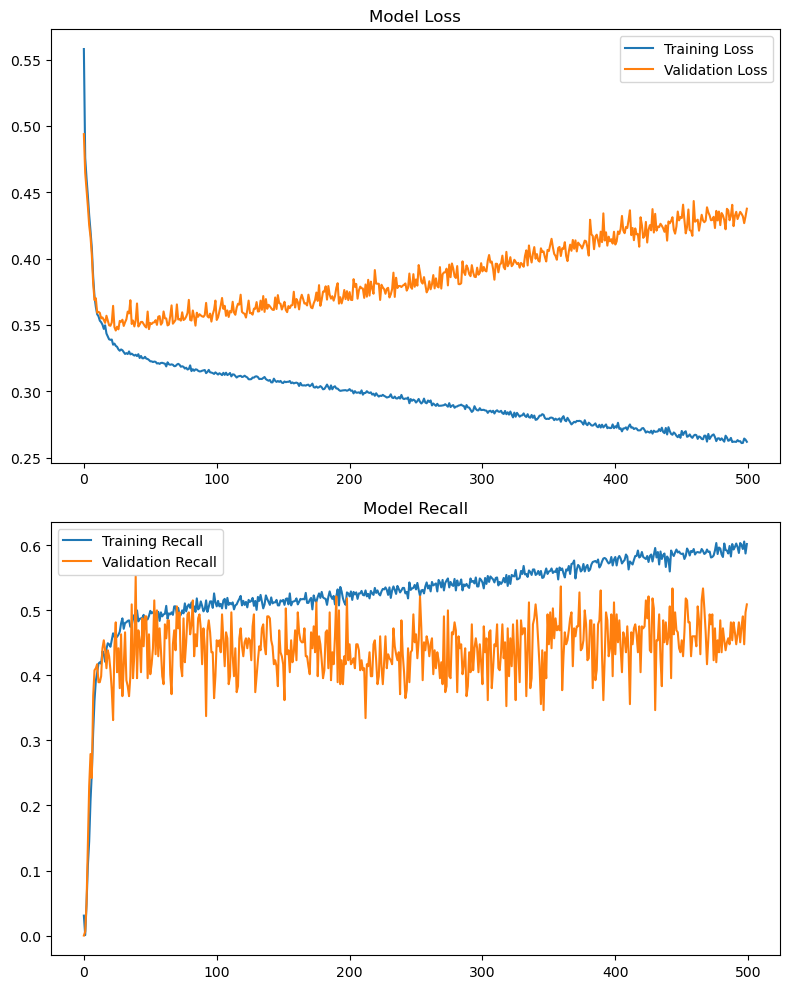

In [71]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Plot loss
axes[0].plot(loss_df["loss"], label="Training Loss")
axes[0].plot(loss_df["val_loss"], label="Validation Loss")
axes[0].set_title("Model Loss")
axes[0].legend()

# Plot accuracy
axes[1].plot(loss_df["recall"], label="Training Recall")
axes[1].plot(loss_df["val_recall"], label="Validation Recall")
axes[1].set_title("Model Recall")
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

In [72]:
model.evaluate(X_test, y_test, verbose=1)

63/63 [==============================] - 0s 719us/step - loss: 0.4209 - recall: 0.5381


[0.42088669538497925, 0.538083553314209]

In [73]:
loss, Recall = model.evaluate(X_test, y_test, verbose=1)
print("loss: ", loss)
print("Recall: ", Recall)

63/63 [==============================] - 0s 720us/step - loss: 0.4209 - recall: 0.5381
loss:  0.42088669538497925
Recall:  0.538083553314209


In [74]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1475  118]
 [ 188  219]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1593
           1       0.65      0.54      0.59       407

    accuracy                           0.85      2000
   macro avg       0.77      0.73      0.75      2000
weighted avg       0.84      0.85      0.84      2000



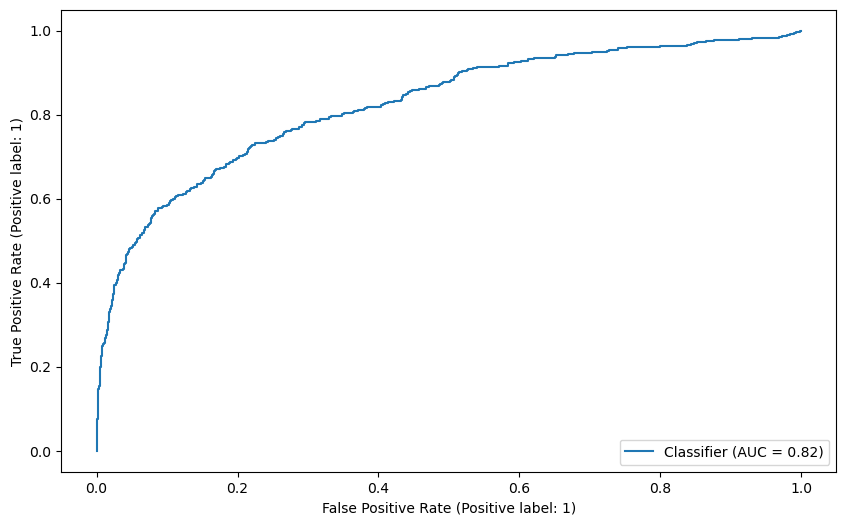

In [75]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [76]:
!pip install scikit-plot

In [77]:
from scikitplot.metrics import plot_roc, precision_recall_curve,average_precision_score

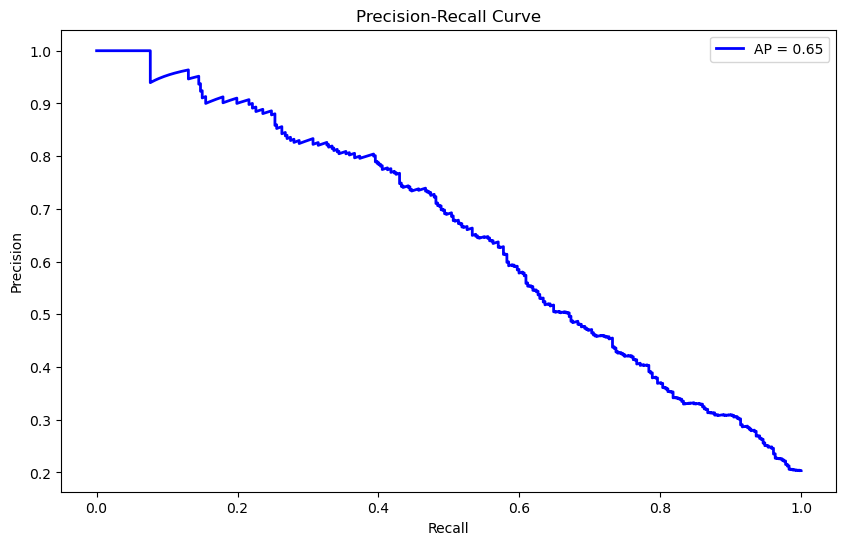

In [78]:
y_pred_proba = model.predict(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

average_precision = average_precision_score(y_test, y_pred_proba)

plt.plot(recall, precision, color='blue', lw=2, label=f'AP = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

In [79]:
from sklearn.metrics import average_precision_score, precision_score, recall_score

In [80]:
y_pred = model.predict(X_test) > 0.5
model_AP = average_precision_score(y_test, y_pred)
model_precision = precision_score(y_test, y_pred)
model_recall = recall_score(y_test, y_pred)

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [81]:
X = df.drop("Exited", axis = 1)
y = df["Exited"]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y , random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, stratify = y_train, random_state = 42)

In [83]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [84]:
unique_classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=unique_classes, y=y_train)
class_weights_dict = dict(zip(unique_classes, class_weights))

print(unique_classes)
print(class_weights)
print("Class Weights:", class_weights_dict)

[0 1]
[0.62794349 2.45398773]
Class Weights: {0: 0.6279434850863422, 1: 2.4539877300613497}


In [85]:
model2 = Sequential()

model2.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model2.add(Dense(18, activation="relu"))
model2.add(Dense(9, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))

model2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [86]:
model2.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=500,
    class_weight=class_weights_dict,
    verbose = 1
)

Epoch 1/500
100/100 [==============================] - 0s 3ms/step - loss: 0.6611 - recall: 0.6580 - val_loss: 0.6417 - val_recall: 0.5767
Epoch 2/500
100/100 [==============================] - 0s 958us/step - loss: 0.6289 - recall: 0.6396 - val_loss: 0.6404 - val_recall: 0.6534
Epoch 3/500
100/100 [==============================] - 0s 940us/step - loss: 0.6057 - recall: 0.6825 - val_loss: 0.5712 - val_recall: 0.5828
Epoch 4/500
100/100 [==============================] - 0s 976us/step - loss: 0.5850 - recall: 0.7009 - val_loss: 0.5922 - val_recall: 0.6963
Epoch 5/500
100/100 [==============================] - 0s 1ms/step - loss: 0.5680 - recall: 0.7117 - val_loss: 0.6189 - val_recall: 0.7607
Epoch 6/500
100/100 [==============================] - 0s 946us/step - loss: 0.5574 - recall: 0.7063 - val_loss: 0.6373 - val_recall: 0.8037
Epoch 7/500
100/100 [==============================] - 0s 927us/step - loss: 0.5405 - recall: 0.7193 - val_loss: 0.5402 - val_recall: 0.7270
Epoch 8/500
100/1

100/100 [==============================] - 0s 929us/step - loss: 0.4359 - recall: 0.7761 - val_loss: 0.4279 - val_recall: 0.7086
Epoch 60/500
100/100 [==============================] - 0s 870us/step - loss: 0.4356 - recall: 0.7669 - val_loss: 0.4475 - val_recall: 0.7209
Epoch 61/500
100/100 [==============================] - 0s 989us/step - loss: 0.4342 - recall: 0.7745 - val_loss: 0.4346 - val_recall: 0.7178
Epoch 62/500
100/100 [==============================] - 0s 994us/step - loss: 0.4334 - recall: 0.7853 - val_loss: 0.4492 - val_recall: 0.7301
Epoch 63/500
100/100 [==============================] - 0s 988us/step - loss: 0.4307 - recall: 0.7715 - val_loss: 0.4430 - val_recall: 0.7147
Epoch 64/500
100/100 [==============================] - 0s 951us/step - loss: 0.4331 - recall: 0.7784 - val_loss: 0.4287 - val_recall: 0.6748
Epoch 65/500
100/100 [==============================] - 0s 915us/step - loss: 0.4324 - recall: 0.7715 - val_loss: 0.4888 - val_recall: 0.7761
Epoch 66/500
100/10

Epoch 117/500
100/100 [==============================] - 0s 941us/step - loss: 0.4095 - recall: 0.7914 - val_loss: 0.4691 - val_recall: 0.7178
Epoch 118/500
100/100 [==============================] - 0s 909us/step - loss: 0.4084 - recall: 0.7960 - val_loss: 0.4600 - val_recall: 0.7086
Epoch 119/500
100/100 [==============================] - 0s 972us/step - loss: 0.4081 - recall: 0.7883 - val_loss: 0.4724 - val_recall: 0.7209
Epoch 120/500
100/100 [==============================] - 0s 952us/step - loss: 0.4073 - recall: 0.7922 - val_loss: 0.4530 - val_recall: 0.7025
Epoch 121/500
100/100 [==============================] - 0s 975us/step - loss: 0.4066 - recall: 0.7983 - val_loss: 0.4787 - val_recall: 0.7485
Epoch 122/500
100/100 [==============================] - 0s 988us/step - loss: 0.4071 - recall: 0.7960 - val_loss: 0.4873 - val_recall: 0.7485
Epoch 123/500
100/100 [==============================] - 0s 1ms/step - loss: 0.4046 - recall: 0.7868 - val_loss: 0.4977 - val_recall: 0.7638
E

100/100 [==============================] - 0s 954us/step - loss: 0.3990 - recall: 0.7922 - val_loss: 0.4993 - val_recall: 0.7454
Epoch 175/500
100/100 [==============================] - 0s 1ms/step - loss: 0.3942 - recall: 0.8113 - val_loss: 0.4244 - val_recall: 0.6227
Epoch 176/500
100/100 [==============================] - 0s 995us/step - loss: 0.3946 - recall: 0.7983 - val_loss: 0.5121 - val_recall: 0.7638
Epoch 177/500
100/100 [==============================] - 0s 1ms/step - loss: 0.3920 - recall: 0.7983 - val_loss: 0.4544 - val_recall: 0.6902
Epoch 178/500
100/100 [==============================] - 0s 1ms/step - loss: 0.3944 - recall: 0.8021 - val_loss: 0.5049 - val_recall: 0.7301
Epoch 179/500
100/100 [==============================] - 0s 1ms/step - loss: 0.3945 - recall: 0.8060 - val_loss: 0.4350 - val_recall: 0.6564
Epoch 180/500
100/100 [==============================] - 0s 1ms/step - loss: 0.3937 - recall: 0.7983 - val_loss: 0.5029 - val_recall: 0.7485
Epoch 181/500
100/100 [

Epoch 232/500
100/100 [==============================] - 0s 937us/step - loss: 0.3841 - recall: 0.8106 - val_loss: 0.4880 - val_recall: 0.7117
Epoch 233/500
100/100 [==============================] - 0s 992us/step - loss: 0.3833 - recall: 0.8052 - val_loss: 0.5036 - val_recall: 0.7362
Epoch 234/500
100/100 [==============================] - 0s 1ms/step - loss: 0.3814 - recall: 0.8183 - val_loss: 0.5275 - val_recall: 0.7577
Epoch 235/500
100/100 [==============================] - 0s 949us/step - loss: 0.3848 - recall: 0.8113 - val_loss: 0.4500 - val_recall: 0.6779
Epoch 236/500
100/100 [==============================] - 0s 879us/step - loss: 0.3843 - recall: 0.8083 - val_loss: 0.4652 - val_recall: 0.6779
Epoch 237/500
100/100 [==============================] - 0s 915us/step - loss: 0.3843 - recall: 0.8144 - val_loss: 0.5494 - val_recall: 0.7699
Epoch 238/500
100/100 [==============================] - 0s 918us/step - loss: 0.3826 - recall: 0.8198 - val_loss: 0.4891 - val_recall: 0.7239
E

100/100 [==============================] - 0s 891us/step - loss: 0.3737 - recall: 0.8213 - val_loss: 0.5035 - val_recall: 0.7209
Epoch 290/500
100/100 [==============================] - 0s 845us/step - loss: 0.3712 - recall: 0.8098 - val_loss: 0.4773 - val_recall: 0.6810
Epoch 291/500
100/100 [==============================] - 0s 957us/step - loss: 0.3740 - recall: 0.8236 - val_loss: 0.4943 - val_recall: 0.6748
Epoch 292/500
100/100 [==============================] - 0s 853us/step - loss: 0.3767 - recall: 0.8152 - val_loss: 0.4932 - val_recall: 0.7270
Epoch 293/500
100/100 [==============================] - 0s 849us/step - loss: 0.3729 - recall: 0.8198 - val_loss: 0.4772 - val_recall: 0.6779
Epoch 294/500
100/100 [==============================] - 0s 854us/step - loss: 0.3734 - recall: 0.8198 - val_loss: 0.4977 - val_recall: 0.7117
Epoch 295/500
100/100 [==============================] - 0s 851us/step - loss: 0.3712 - recall: 0.8221 - val_loss: 0.5057 - val_recall: 0.6994
Epoch 296/500

Epoch 347/500
100/100 [==============================] - 0s 1ms/step - loss: 0.3635 - recall: 0.8259 - val_loss: 0.5030 - val_recall: 0.6933
Epoch 348/500
100/100 [==============================] - 0s 1ms/step - loss: 0.3594 - recall: 0.8359 - val_loss: 0.5171 - val_recall: 0.7086
Epoch 349/500
100/100 [==============================] - 0s 1ms/step - loss: 0.3615 - recall: 0.8367 - val_loss: 0.5463 - val_recall: 0.7331
Epoch 350/500
100/100 [==============================] - 0s 1ms/step - loss: 0.3601 - recall: 0.8321 - val_loss: 0.5097 - val_recall: 0.7055
Epoch 351/500
100/100 [==============================] - 0s 1ms/step - loss: 0.3602 - recall: 0.8298 - val_loss: 0.4988 - val_recall: 0.6779
Epoch 352/500
100/100 [==============================] - 0s 971us/step - loss: 0.3604 - recall: 0.8305 - val_loss: 0.4941 - val_recall: 0.6933
Epoch 353/500
100/100 [==============================] - 0s 970us/step - loss: 0.3591 - recall: 0.8275 - val_loss: 0.4733 - val_recall: 0.6534
Epoch 354

100/100 [==============================] - 0s 888us/step - loss: 0.3506 - recall: 0.8428 - val_loss: 0.5478 - val_recall: 0.7147
Epoch 405/500
100/100 [==============================] - 0s 881us/step - loss: 0.3524 - recall: 0.8451 - val_loss: 0.5189 - val_recall: 0.6718
Epoch 406/500
100/100 [==============================] - 0s 945us/step - loss: 0.3494 - recall: 0.8374 - val_loss: 0.5299 - val_recall: 0.6902
Epoch 407/500
100/100 [==============================] - 0s 989us/step - loss: 0.3514 - recall: 0.8351 - val_loss: 0.5543 - val_recall: 0.7117
Epoch 408/500
100/100 [==============================] - 0s 961us/step - loss: 0.3506 - recall: 0.8413 - val_loss: 0.5039 - val_recall: 0.6319
Epoch 409/500
100/100 [==============================] - 0s 950us/step - loss: 0.3498 - recall: 0.8397 - val_loss: 0.5015 - val_recall: 0.6380
Epoch 410/500
100/100 [==============================] - 0s 1ms/step - loss: 0.3537 - recall: 0.8290 - val_loss: 0.5276 - val_recall: 0.6840
Epoch 411/500
1

100/100 [==============================] - 0s 976us/step - loss: 0.3443 - recall: 0.8489 - val_loss: 0.5509 - val_recall: 0.6779
Epoch 462/500
100/100 [==============================] - 0s 950us/step - loss: 0.3411 - recall: 0.8535 - val_loss: 0.5387 - val_recall: 0.6656
Epoch 463/500
100/100 [==============================] - 0s 920us/step - loss: 0.3439 - recall: 0.8451 - val_loss: 0.5516 - val_recall: 0.6595
Epoch 464/500
100/100 [==============================] - 0s 874us/step - loss: 0.3423 - recall: 0.8451 - val_loss: 0.5575 - val_recall: 0.7055
Epoch 465/500
100/100 [==============================] - 0s 955us/step - loss: 0.3449 - recall: 0.8413 - val_loss: 0.5749 - val_recall: 0.7117
Epoch 466/500
100/100 [==============================] - 0s 910us/step - loss: 0.3441 - recall: 0.8551 - val_loss: 0.5421 - val_recall: 0.6227
Epoch 467/500
100/100 [==============================] - 0s 959us/step - loss: 0.3433 - recall: 0.8397 - val_loss: 0.5476 - val_recall: 0.6718
Epoch 468/500

In [87]:
loss_df = pd.DataFrame(model2.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.66,0.66,0.64,0.58
1,0.63,0.64,0.64,0.65
2,0.61,0.68,0.57,0.58
3,0.58,0.70,0.59,0.70
4,0.57,0.71,0.62,0.76


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

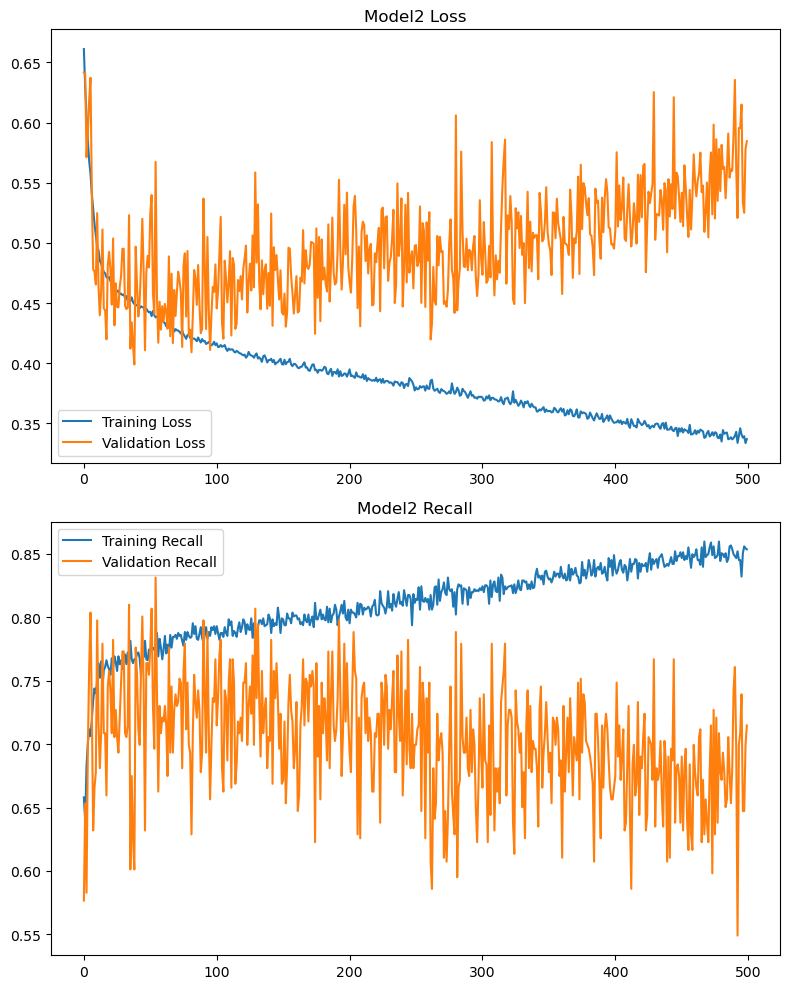

In [88]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Plot loss
axes[0].plot(loss_df["loss"], label="Training Loss")
axes[0].plot(loss_df["val_loss"], label="Validation Loss")
axes[0].set_title("Model2 Loss")
axes[0].legend()

# Plot accuracy
axes[1].plot(loss_df["recall"], label="Training Recall")
axes[1].plot(loss_df["val_recall"], label="Validation Recall")
axes[1].set_title("Model2 Recall")
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

In [89]:
model2.evaluate(X_test, y_test, verbose=1)

63/63 [==============================] - 0s 792us/step - loss: 0.5640 - recall: 0.7445


[0.563977062702179, 0.7444717288017273]

In [90]:
loss, recall = model2.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.563977062702179
recall:  0.7444717288017273


In [91]:
y_pred = model2.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1218  375]
 [ 104  303]]
              precision    recall  f1-score   support

           0       0.92      0.76      0.84      1593
           1       0.45      0.74      0.56       407

    accuracy                           0.76      2000
   macro avg       0.68      0.75      0.70      2000
weighted avg       0.82      0.76      0.78      2000



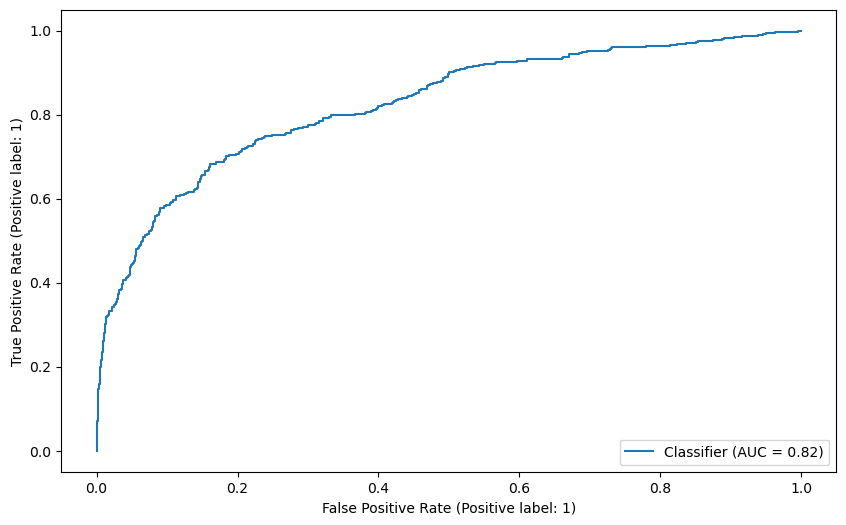

In [92]:
y_pred_proba = model2.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

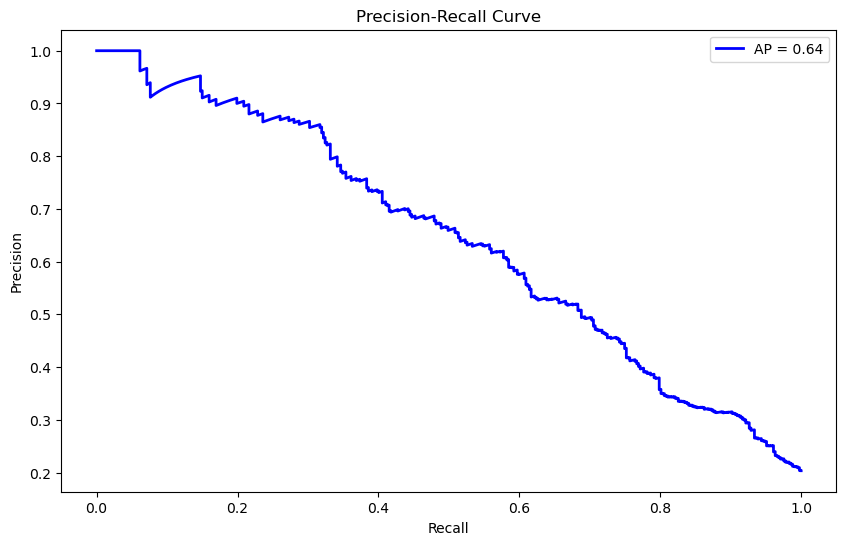

In [93]:
# from scikitplot.metrics import plot_roc, precision_recall_curve,average_precision_score
y_pred_proba = model2.predict(X_test)

precision, recall, _= precision_recall_curve(y_test, y_pred_proba)

average_precision = average_precision_score(y_test, y_pred_proba)

plt.plot(recall, precision, color='blue', lw=2, label=f'AP = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

In [94]:
y_pred = model2.predict(X_test) > 0.5
model2_AP = average_precision_score(y_test, y_pred)
model2_precision = precision_score(y_test, y_pred)
model2_recall = recall_score(y_test, y_pred)

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [95]:
from tensorflow.keras.optimizers import Adam
learning_rate = 0.003

In [96]:
model3 = Sequential()

model3.add(Dense(36, activation = 'relu', input_dim= X_train.shape[1]))
model3.add(Dense(18, activation = 'relu'))
model3.add(Dense(9, activation = 'relu'))
model3.add(Dense(1, activation = 'sigmoid'))

model3.compile(optimizer = Adam(learning_rate = learning_rate), loss= 'binary_crossentropy', metrics = ['Recall'])

In [97]:
model3.fit(
    x = X_train,
    y = y_train,
    validation_data = (X_val, y_val),
    batch_size = 64,
    epochs = 500,
    class_weight = class_weights_dict,
    verbose = 1
)

Epoch 1/500
100/100 [==============================] - 0s 3ms/step - loss: 0.6510 - recall: 0.5920 - val_loss: 0.6463 - val_recall: 0.6718
Epoch 2/500
100/100 [==============================] - 0s 953us/step - loss: 0.5995 - recall: 0.6971 - val_loss: 0.5591 - val_recall: 0.6534
Epoch 3/500
100/100 [==============================] - 0s 944us/step - loss: 0.5600 - recall: 0.7094 - val_loss: 0.6151 - val_recall: 0.7761
Epoch 4/500
100/100 [==============================] - 0s 1ms/step - loss: 0.5211 - recall: 0.7247 - val_loss: 0.6533 - val_recall: 0.8528
Epoch 5/500
100/100 [==============================] - 0s 1ms/step - loss: 0.4938 - recall: 0.7469 - val_loss: 0.4784 - val_recall: 0.7239
Epoch 6/500
100/100 [==============================] - 0s 923us/step - loss: 0.4851 - recall: 0.7500 - val_loss: 0.4580 - val_recall: 0.7270
Epoch 7/500
100/100 [==============================] - 0s 911us/step - loss: 0.4759 - recall: 0.7454 - val_loss: 0.4627 - val_recall: 0.7485
Epoch 8/500
100/100

Epoch 59/500
100/100 [==============================] - 0s 866us/step - loss: 0.4084 - recall: 0.8006 - val_loss: 0.4357 - val_recall: 0.6963
Epoch 60/500
100/100 [==============================] - 0s 871us/step - loss: 0.4080 - recall: 0.7983 - val_loss: 0.4429 - val_recall: 0.7209
Epoch 61/500
100/100 [==============================] - 0s 855us/step - loss: 0.4087 - recall: 0.8029 - val_loss: 0.5070 - val_recall: 0.7883
Epoch 62/500
100/100 [==============================] - 0s 857us/step - loss: 0.4108 - recall: 0.7937 - val_loss: 0.4652 - val_recall: 0.7331
Epoch 63/500
100/100 [==============================] - 0s 823us/step - loss: 0.4089 - recall: 0.7998 - val_loss: 0.4254 - val_recall: 0.6748
Epoch 64/500
100/100 [==============================] - 0s 852us/step - loss: 0.4061 - recall: 0.7876 - val_loss: 0.4463 - val_recall: 0.6963
Epoch 65/500
100/100 [==============================] - 0s 853us/step - loss: 0.4040 - recall: 0.8098 - val_loss: 0.5011 - val_recall: 0.7331
Epoch 

100/100 [==============================] - 0s 995us/step - loss: 0.3659 - recall: 0.8328 - val_loss: 0.4793 - val_recall: 0.6840
Epoch 117/500
100/100 [==============================] - 0s 989us/step - loss: 0.3632 - recall: 0.8267 - val_loss: 0.4794 - val_recall: 0.6748
Epoch 118/500
100/100 [==============================] - 0s 996us/step - loss: 0.3585 - recall: 0.8290 - val_loss: 0.4950 - val_recall: 0.6871
Epoch 119/500
100/100 [==============================] - 0s 949us/step - loss: 0.3594 - recall: 0.8236 - val_loss: 0.4782 - val_recall: 0.6687
Epoch 120/500
100/100 [==============================] - 0s 994us/step - loss: 0.3618 - recall: 0.8367 - val_loss: 0.5002 - val_recall: 0.6963
Epoch 121/500
100/100 [==============================] - 0s 963us/step - loss: 0.3593 - recall: 0.8229 - val_loss: 0.5474 - val_recall: 0.7239
Epoch 122/500
100/100 [==============================] - 0s 939us/step - loss: 0.3565 - recall: 0.8328 - val_loss: 0.4706 - val_recall: 0.6656
Epoch 123/500

100/100 [==============================] - 0s 909us/step - loss: 0.3204 - recall: 0.8612 - val_loss: 0.5481 - val_recall: 0.6350
Epoch 174/500
100/100 [==============================] - 0s 926us/step - loss: 0.3230 - recall: 0.8597 - val_loss: 0.5742 - val_recall: 0.6564
Epoch 175/500
100/100 [==============================] - 0s 961us/step - loss: 0.3202 - recall: 0.8551 - val_loss: 0.5958 - val_recall: 0.6871
Epoch 176/500
100/100 [==============================] - 0s 883us/step - loss: 0.3223 - recall: 0.8535 - val_loss: 0.5671 - val_recall: 0.6472
Epoch 177/500
100/100 [==============================] - 0s 877us/step - loss: 0.3190 - recall: 0.8597 - val_loss: 0.5715 - val_recall: 0.6564
Epoch 178/500
100/100 [==============================] - 0s 929us/step - loss: 0.3242 - recall: 0.8574 - val_loss: 0.5649 - val_recall: 0.6503
Epoch 179/500
100/100 [==============================] - 0s 901us/step - loss: 0.3215 - recall: 0.8482 - val_loss: 0.6428 - val_recall: 0.6994
Epoch 180/500

100/100 [==============================] - 0s 934us/step - loss: 0.3002 - recall: 0.8857 - val_loss: 0.7027 - val_recall: 0.7025
Epoch 231/500
100/100 [==============================] - 0s 907us/step - loss: 0.2981 - recall: 0.8834 - val_loss: 0.6521 - val_recall: 0.6933
Epoch 232/500
100/100 [==============================] - 0s 937us/step - loss: 0.2919 - recall: 0.8765 - val_loss: 0.6458 - val_recall: 0.6380
Epoch 233/500
100/100 [==============================] - 0s 922us/step - loss: 0.2981 - recall: 0.8873 - val_loss: 0.6985 - val_recall: 0.6810
Epoch 234/500
100/100 [==============================] - 0s 893us/step - loss: 0.3046 - recall: 0.8681 - val_loss: 0.6349 - val_recall: 0.6748
Epoch 235/500
100/100 [==============================] - 0s 885us/step - loss: 0.2969 - recall: 0.8865 - val_loss: 0.6165 - val_recall: 0.6442
Epoch 236/500
100/100 [==============================] - 0s 937us/step - loss: 0.2966 - recall: 0.8850 - val_loss: 0.6242 - val_recall: 0.6626
Epoch 237/500

100/100 [==============================] - 0s 1ms/step - loss: 0.2770 - recall: 0.8888 - val_loss: 0.7379 - val_recall: 0.6810
Epoch 288/500
100/100 [==============================] - 0s 1ms/step - loss: 0.2837 - recall: 0.8842 - val_loss: 0.6432 - val_recall: 0.6258
Epoch 289/500
100/100 [==============================] - 0s 981us/step - loss: 0.2758 - recall: 0.9011 - val_loss: 0.7143 - val_recall: 0.6534
Epoch 290/500
100/100 [==============================] - 0s 980us/step - loss: 0.2789 - recall: 0.8903 - val_loss: 0.7034 - val_recall: 0.6748
Epoch 291/500
100/100 [==============================] - 0s 1ms/step - loss: 0.2773 - recall: 0.8896 - val_loss: 0.6622 - val_recall: 0.6227
Epoch 292/500
100/100 [==============================] - 0s 965us/step - loss: 0.2901 - recall: 0.8896 - val_loss: 0.7381 - val_recall: 0.6687
Epoch 293/500
100/100 [==============================] - 0s 1ms/step - loss: 0.2979 - recall: 0.8819 - val_loss: 0.6776 - val_recall: 0.6166
Epoch 294/500
100/100

100/100 [==============================] - 0s 966us/step - loss: 0.2709 - recall: 0.8972 - val_loss: 0.7489 - val_recall: 0.6656
Epoch 345/500
100/100 [==============================] - 0s 907us/step - loss: 0.2704 - recall: 0.8896 - val_loss: 0.7635 - val_recall: 0.6564
Epoch 346/500
100/100 [==============================] - 0s 860us/step - loss: 0.2660 - recall: 0.9011 - val_loss: 0.7365 - val_recall: 0.6380
Epoch 347/500
100/100 [==============================] - 0s 938us/step - loss: 0.2660 - recall: 0.8980 - val_loss: 0.7826 - val_recall: 0.6687
Epoch 348/500
100/100 [==============================] - 0s 1ms/step - loss: 0.2616 - recall: 0.9041 - val_loss: 0.7349 - val_recall: 0.6534
Epoch 349/500
100/100 [==============================] - 0s 1ms/step - loss: 0.2695 - recall: 0.8972 - val_loss: 0.7363 - val_recall: 0.6534
Epoch 350/500
100/100 [==============================] - 0s 979us/step - loss: 0.2697 - recall: 0.9003 - val_loss: 0.7720 - val_recall: 0.6656
Epoch 351/500
100

100/100 [==============================] - 0s 860us/step - loss: 0.2612 - recall: 0.9064 - val_loss: 0.7355 - val_recall: 0.6258
Epoch 402/500
100/100 [==============================] - 0s 966us/step - loss: 0.2551 - recall: 0.9103 - val_loss: 0.7969 - val_recall: 0.6534
Epoch 403/500
100/100 [==============================] - 0s 936us/step - loss: 0.2585 - recall: 0.9018 - val_loss: 0.7177 - val_recall: 0.6074
Epoch 404/500
100/100 [==============================] - 0s 830us/step - loss: 0.2641 - recall: 0.9064 - val_loss: 0.7690 - val_recall: 0.6595
Epoch 405/500
100/100 [==============================] - 0s 892us/step - loss: 0.2616 - recall: 0.8965 - val_loss: 0.7823 - val_recall: 0.6472
Epoch 406/500
100/100 [==============================] - 0s 868us/step - loss: 0.2728 - recall: 0.9057 - val_loss: 0.7640 - val_recall: 0.6626
Epoch 407/500
100/100 [==============================] - 0s 867us/step - loss: 0.2629 - recall: 0.9018 - val_loss: 0.7968 - val_recall: 0.6656
Epoch 408/500

100/100 [==============================] - 0s 998us/step - loss: 0.2454 - recall: 0.9233 - val_loss: 0.8130 - val_recall: 0.6595
Epoch 459/500
100/100 [==============================] - 0s 1ms/step - loss: 0.2494 - recall: 0.9118 - val_loss: 0.7652 - val_recall: 0.6595
Epoch 460/500
100/100 [==============================] - 0s 1ms/step - loss: 0.2623 - recall: 0.9018 - val_loss: 0.8463 - val_recall: 0.6380
Epoch 461/500
100/100 [==============================] - 0s 1ms/step - loss: 0.2553 - recall: 0.9064 - val_loss: 0.8117 - val_recall: 0.6012
Epoch 462/500
100/100 [==============================] - 0s 1ms/step - loss: 0.2557 - recall: 0.9064 - val_loss: 0.8034 - val_recall: 0.6288
Epoch 463/500
100/100 [==============================] - 0s 993us/step - loss: 0.2596 - recall: 0.8965 - val_loss: 0.7928 - val_recall: 0.6104
Epoch 464/500
100/100 [==============================] - 0s 1ms/step - loss: 0.2526 - recall: 0.9141 - val_loss: 0.8377 - val_recall: 0.6687
Epoch 465/500
100/100 [

In [98]:
loss3_df = pd.DataFrame(model3.history.history)
loss3_df.head()

,loss,recall,val_loss,val_recall
0,0.65,0.59,0.65,0.67
1,0.60,0.70,0.56,0.65
2,0.56,0.71,0.62,0.78
3,0.52,0.72,0.65,0.85
4,0.49,0.75,0.48,0.72


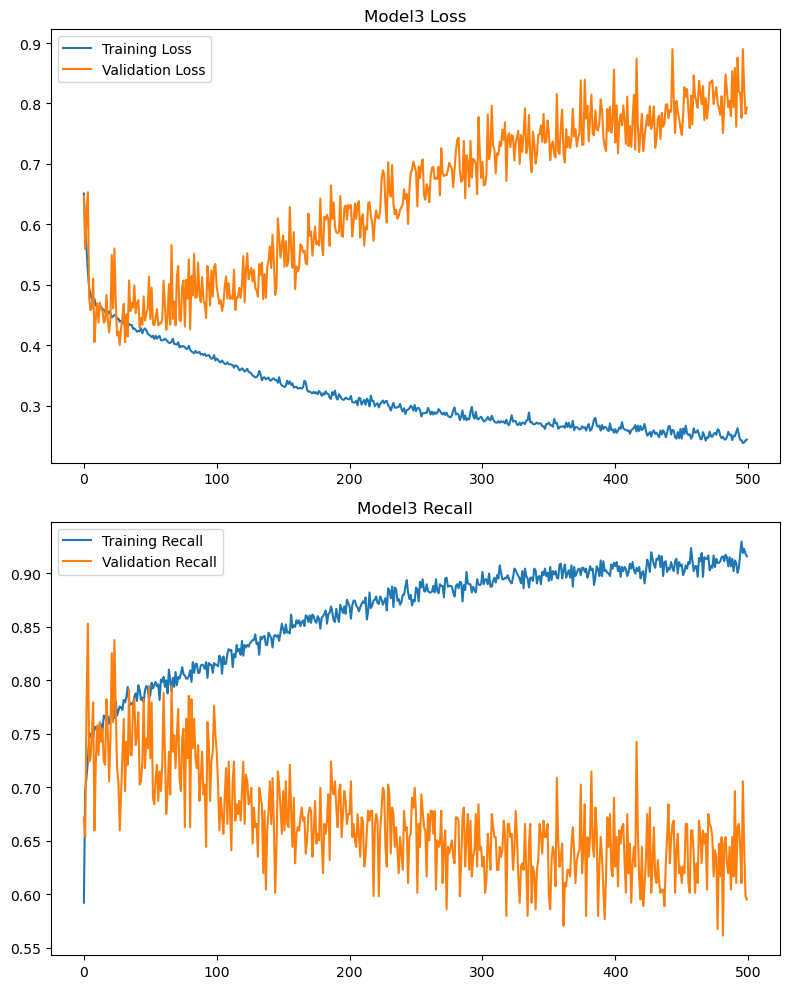

In [99]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Plot loss
axes[0].plot(loss3_df["loss"], label="Training Loss")
axes[0].plot(loss3_df["val_loss"], label="Validation Loss")
axes[0].set_title("Model3 Loss")
axes[0].legend()

# Plot accuracy
axes[1].plot(loss3_df["recall"], label="Training Recall")
axes[1].plot(loss3_df["val_recall"], label="Validation Recall")
axes[1].set_title("Model3 Recall")
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

In [100]:
loss, recall = model3.evaluate(X_test, y_test, verbose=1)
print("loss: ", loss)
print("recall: ", recall)

63/63 [==============================] - 0s 854us/step - loss: 0.7987 - recall: 0.6143
loss:  0.7986859679222107
recall:  0.6142506003379822


In [101]:
y_pred = model3.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1289  304]
 [ 157  250]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1593
           1       0.45      0.61      0.52       407

    accuracy                           0.77      2000
   macro avg       0.67      0.71      0.68      2000
weighted avg       0.80      0.77      0.78      2000



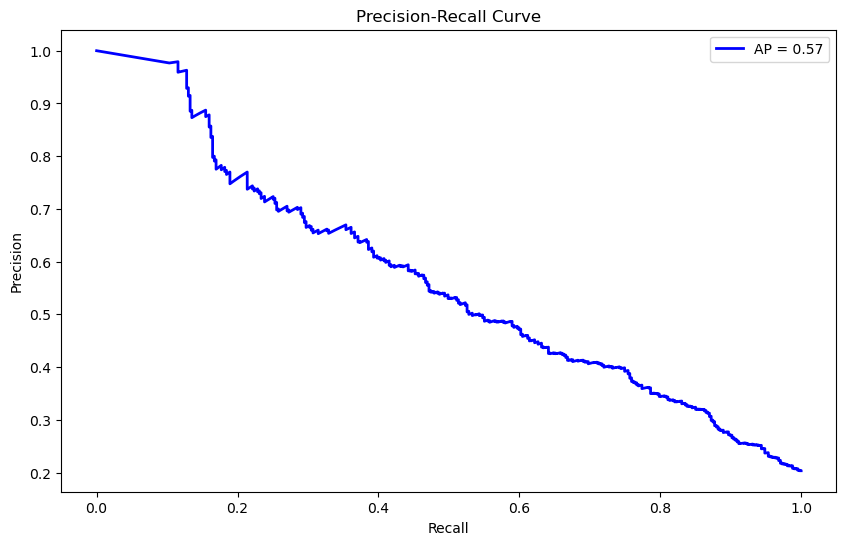

In [102]:
y_pred_proba = model3.predict(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

average_precision = average_precision_score(y_test, y_pred_proba)

plt.plot(recall, precision, color='blue', lw=2, label=f'AP = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

In [103]:
y_pred = model3.predict(X_test) > 0.5
model3_AP = average_precision_score(y_test, y_pred)
model3_precision = precision_score(y_test, y_pred)
model3_recall = recall_score(y_test, y_pred)

### Add Dropout Layer

In [104]:
from tensorflow.keras.layers import Dropout

In [105]:
model4 = Sequential()

model4.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model4.add(Dropout(0.5))

model4.add(Dense(18, activation="relu"))
model4.add(Dropout(0.5))

model4.add(Dense(9, activation="relu"))
model4.add(Dropout(0.5))

model4.add(Dense(1, activation="sigmoid"))

opt=Adam(learning_rate = learning_rate)
model4.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [106]:
model4.fit(
    x = X_train,
    y = y_train,
    validation_data = (X_val, y_val),
    batch_size = 64,
    epochs = 500,
    class_weight = class_weights_dict,
    verbose = 1
)

Epoch 1/500
100/100 [==============================] - 0s 3ms/step - loss: 0.6970 - recall: 0.6380 - val_loss: 0.6997 - val_recall: 0.9969
Epoch 2/500
100/100 [==============================] - 0s 900us/step - loss: 0.6888 - recall: 0.6380 - val_loss: 0.6796 - val_recall: 0.4755
Epoch 3/500
100/100 [==============================] - 0s 942us/step - loss: 0.6805 - recall: 0.3865 - val_loss: 0.6503 - val_recall: 0.5460
Epoch 4/500
100/100 [==============================] - 0s 947us/step - loss: 0.6669 - recall: 0.4563 - val_loss: 0.6677 - val_recall: 0.6227
Epoch 5/500
100/100 [==============================] - 0s 933us/step - loss: 0.6590 - recall: 0.5054 - val_loss: 0.6425 - val_recall: 0.7025
Epoch 6/500
100/100 [==============================] - 0s 907us/step - loss: 0.6425 - recall: 0.5613 - val_loss: 0.5829 - val_recall: 0.6135
Epoch 7/500
100/100 [==============================] - 0s 946us/step - loss: 0.6290 - recall: 0.5913 - val_loss: 0.5417 - val_recall: 0.5613
Epoch 8/500
100

Epoch 59/500
100/100 [==============================] - 0s 1ms/step - loss: 0.5206 - recall: 0.7216 - val_loss: 0.4865 - val_recall: 0.7362
Epoch 60/500
100/100 [==============================] - 0s 1ms/step - loss: 0.5261 - recall: 0.7569 - val_loss: 0.4901 - val_recall: 0.7577
Epoch 61/500
100/100 [==============================] - 0s 992us/step - loss: 0.5371 - recall: 0.7615 - val_loss: 0.4832 - val_recall: 0.7546
Epoch 62/500
100/100 [==============================] - 0s 947us/step - loss: 0.5260 - recall: 0.7377 - val_loss: 0.4897 - val_recall: 0.7607
Epoch 63/500
100/100 [==============================] - 0s 944us/step - loss: 0.5327 - recall: 0.7492 - val_loss: 0.5588 - val_recall: 0.8282
Epoch 64/500
100/100 [==============================] - 0s 970us/step - loss: 0.5240 - recall: 0.7561 - val_loss: 0.4984 - val_recall: 0.8160
Epoch 65/500
100/100 [==============================] - 0s 948us/step - loss: 0.5324 - recall: 0.7638 - val_loss: 0.4695 - val_recall: 0.7270
Epoch 66/5

100/100 [==============================] - 0s 879us/step - loss: 0.5243 - recall: 0.7600 - val_loss: 0.5010 - val_recall: 0.7546
Epoch 117/500
100/100 [==============================] - 0s 864us/step - loss: 0.5169 - recall: 0.7485 - val_loss: 0.4859 - val_recall: 0.7331
Epoch 118/500
100/100 [==============================] - 0s 882us/step - loss: 0.5218 - recall: 0.7362 - val_loss: 0.4838 - val_recall: 0.7485
Epoch 119/500
100/100 [==============================] - 0s 881us/step - loss: 0.5273 - recall: 0.7393 - val_loss: 0.4793 - val_recall: 0.7086
Epoch 120/500
100/100 [==============================] - 0s 885us/step - loss: 0.5133 - recall: 0.7715 - val_loss: 0.4584 - val_recall: 0.7301
Epoch 121/500
100/100 [==============================] - 0s 842us/step - loss: 0.5206 - recall: 0.7454 - val_loss: 0.4684 - val_recall: 0.7270
Epoch 122/500
100/100 [==============================] - 0s 867us/step - loss: 0.5287 - recall: 0.7607 - val_loss: 0.4544 - val_recall: 0.6963
Epoch 123/500

100/100 [==============================] - 0s 875us/step - loss: 0.5129 - recall: 0.7584 - val_loss: 0.4820 - val_recall: 0.7239
Epoch 174/500
100/100 [==============================] - 0s 875us/step - loss: 0.5191 - recall: 0.7362 - val_loss: 0.4937 - val_recall: 0.7147
Epoch 175/500
100/100 [==============================] - 0s 869us/step - loss: 0.5258 - recall: 0.7561 - val_loss: 0.4884 - val_recall: 0.8067
Epoch 176/500
100/100 [==============================] - 0s 889us/step - loss: 0.5232 - recall: 0.7929 - val_loss: 0.4320 - val_recall: 0.6871
Epoch 177/500
100/100 [==============================] - 0s 877us/step - loss: 0.5195 - recall: 0.7615 - val_loss: 0.5093 - val_recall: 0.7669
Epoch 178/500
100/100 [==============================] - 0s 1ms/step - loss: 0.5095 - recall: 0.7554 - val_loss: 0.4792 - val_recall: 0.7331
Epoch 179/500
100/100 [==============================] - 0s 908us/step - loss: 0.5183 - recall: 0.7653 - val_loss: 0.4821 - val_recall: 0.7638
Epoch 180/500
1

100/100 [==============================] - 0s 998us/step - loss: 0.5226 - recall: 0.7623 - val_loss: 0.4493 - val_recall: 0.6626
Epoch 231/500
100/100 [==============================] - 0s 971us/step - loss: 0.5227 - recall: 0.7607 - val_loss: 0.4898 - val_recall: 0.7975
Epoch 232/500
100/100 [==============================] - 0s 992us/step - loss: 0.5115 - recall: 0.7753 - val_loss: 0.4565 - val_recall: 0.7147
Epoch 233/500
100/100 [==============================] - 0s 1ms/step - loss: 0.5181 - recall: 0.7707 - val_loss: 0.4523 - val_recall: 0.7577
Epoch 234/500
100/100 [==============================] - 0s 962us/step - loss: 0.5275 - recall: 0.7768 - val_loss: 0.4933 - val_recall: 0.7822
Epoch 235/500
100/100 [==============================] - 0s 927us/step - loss: 0.5261 - recall: 0.7891 - val_loss: 0.4887 - val_recall: 0.8037
Epoch 236/500
100/100 [==============================] - 0s 960us/step - loss: 0.5210 - recall: 0.7807 - val_loss: 0.4697 - val_recall: 0.7730
Epoch 237/500
1

100/100 [==============================] - 0s 924us/step - loss: 0.5172 - recall: 0.7845 - val_loss: 0.4899 - val_recall: 0.7883
Epoch 288/500
100/100 [==============================] - 0s 860us/step - loss: 0.5189 - recall: 0.8090 - val_loss: 0.4680 - val_recall: 0.7515
Epoch 289/500
100/100 [==============================] - 0s 949us/step - loss: 0.5133 - recall: 0.8037 - val_loss: 0.4670 - val_recall: 0.7853
Epoch 290/500
100/100 [==============================] - 0s 981us/step - loss: 0.5150 - recall: 0.7929 - val_loss: 0.4622 - val_recall: 0.7607
Epoch 291/500
100/100 [==============================] - 0s 949us/step - loss: 0.5107 - recall: 0.8014 - val_loss: 0.4867 - val_recall: 0.8067
Epoch 292/500
100/100 [==============================] - 0s 871us/step - loss: 0.5176 - recall: 0.8098 - val_loss: 0.4524 - val_recall: 0.7393
Epoch 293/500
100/100 [==============================] - 0s 932us/step - loss: 0.5255 - recall: 0.7914 - val_loss: 0.4895 - val_recall: 0.7638
Epoch 294/500

100/100 [==============================] - 0s 984us/step - loss: 0.5138 - recall: 0.8090 - val_loss: 0.4604 - val_recall: 0.7822
Epoch 345/500
100/100 [==============================] - 0s 991us/step - loss: 0.5220 - recall: 0.7952 - val_loss: 0.4964 - val_recall: 0.8037
Epoch 346/500
100/100 [==============================] - 0s 965us/step - loss: 0.5186 - recall: 0.7945 - val_loss: 0.4876 - val_recall: 0.7761
Epoch 347/500
100/100 [==============================] - 0s 968us/step - loss: 0.5328 - recall: 0.7883 - val_loss: 0.4756 - val_recall: 0.7454
Epoch 348/500
100/100 [==============================] - 0s 907us/step - loss: 0.5235 - recall: 0.7975 - val_loss: 0.4621 - val_recall: 0.7485
Epoch 349/500
100/100 [==============================] - 0s 904us/step - loss: 0.5279 - recall: 0.7669 - val_loss: 0.5101 - val_recall: 0.7914
Epoch 350/500
100/100 [==============================] - 0s 930us/step - loss: 0.5139 - recall: 0.7630 - val_loss: 0.4476 - val_recall: 0.7239
Epoch 351/500

100/100 [==============================] - 0s 998us/step - loss: 0.5156 - recall: 0.7753 - val_loss: 0.4667 - val_recall: 0.7669
Epoch 402/500
100/100 [==============================] - 0s 1ms/step - loss: 0.5184 - recall: 0.7922 - val_loss: 0.4661 - val_recall: 0.7730
Epoch 403/500
100/100 [==============================] - 0s 965us/step - loss: 0.5114 - recall: 0.7822 - val_loss: 0.4681 - val_recall: 0.7883
Epoch 404/500
100/100 [==============================] - 0s 1ms/step - loss: 0.5179 - recall: 0.8090 - val_loss: 0.4915 - val_recall: 0.8528
Epoch 405/500
100/100 [==============================] - 0s 1ms/step - loss: 0.5261 - recall: 0.8044 - val_loss: 0.4806 - val_recall: 0.8405
Epoch 406/500
100/100 [==============================] - 0s 1ms/step - loss: 0.5114 - recall: 0.8167 - val_loss: 0.4504 - val_recall: 0.8006
Epoch 407/500
100/100 [==============================] - 0s 943us/step - loss: 0.5170 - recall: 0.7914 - val_loss: 0.4573 - val_recall: 0.7761
Epoch 408/500
100/100

100/100 [==============================] - 0s 986us/step - loss: 0.5163 - recall: 0.8106 - val_loss: 0.4851 - val_recall: 0.8006
Epoch 459/500
100/100 [==============================] - 0s 973us/step - loss: 0.5175 - recall: 0.8167 - val_loss: 0.4518 - val_recall: 0.7301
Epoch 460/500
100/100 [==============================] - 0s 949us/step - loss: 0.5119 - recall: 0.8029 - val_loss: 0.4742 - val_recall: 0.7669
Epoch 461/500
100/100 [==============================] - 0s 940us/step - loss: 0.5156 - recall: 0.8044 - val_loss: 0.4693 - val_recall: 0.8006
Epoch 462/500
100/100 [==============================] - 0s 969us/step - loss: 0.5077 - recall: 0.8152 - val_loss: 0.4807 - val_recall: 0.7730
Epoch 463/500
100/100 [==============================] - 0s 952us/step - loss: 0.5185 - recall: 0.8221 - val_loss: 0.4629 - val_recall: 0.7699
Epoch 464/500
100/100 [==============================] - 0s 933us/step - loss: 0.5157 - recall: 0.7998 - val_loss: 0.4832 - val_recall: 0.8037
Epoch 465/500

In [107]:
loss4_df = pd.DataFrame(model4.history.history)
loss4_df.head()

,loss,recall,val_loss,val_recall
0,0.70,0.64,0.70,1.00
1,0.69,0.64,0.68,0.48
2,0.68,0.39,0.65,0.55
3,0.67,0.46,0.67,0.62
4,0.66,0.51,0.64,0.70


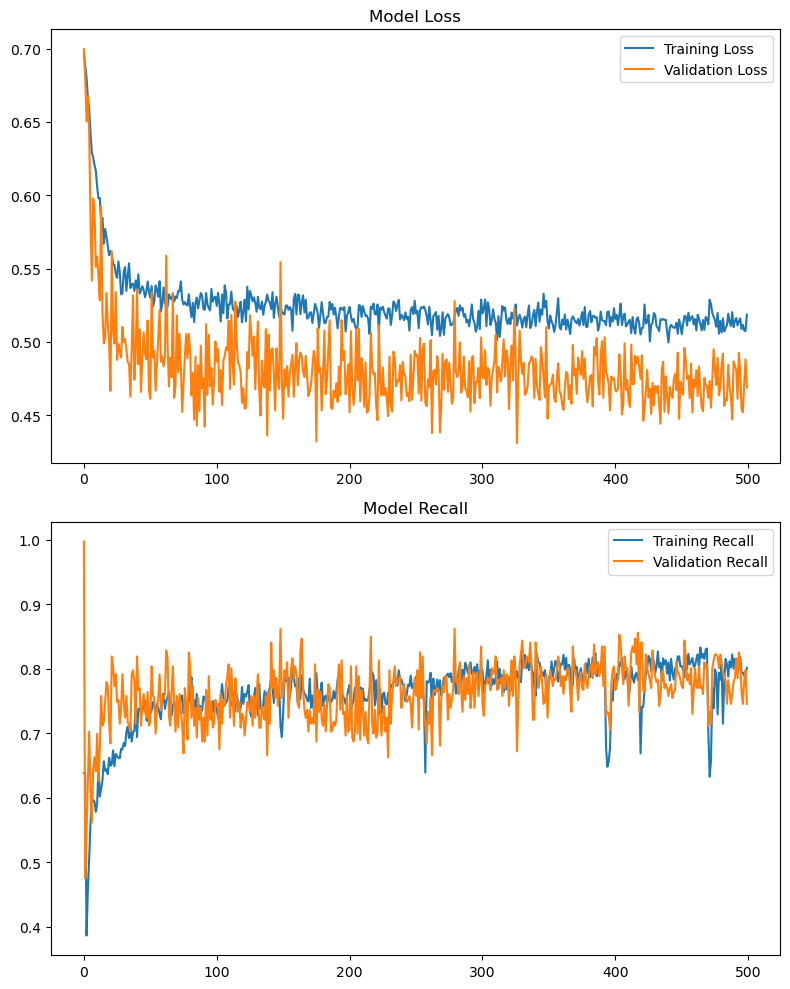

In [108]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Plot loss
axes[0].plot(loss4_df["loss"], label="Training Loss")
axes[0].plot(loss4_df["val_loss"], label="Validation Loss")
axes[0].set_title("Model Loss")
axes[0].legend()

# Plot accuracy
axes[1].plot(loss4_df["recall"], label="Training Recall")
axes[1].plot(loss4_df["val_recall"], label="Validation Recall")
axes[1].set_title("Model Recall")
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

In [109]:
model4.evaluate(X_test, y_test, verbose=1)

63/63 [==============================] - 0s 870us/step - loss: 0.4693 - recall: 0.7789


[0.46934401988983154, 0.7788698077201843]

In [110]:
y_pred = model4.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1218  375]
 [  90  317]]
              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1593
           1       0.46      0.78      0.58       407

    accuracy                           0.77      2000
   macro avg       0.69      0.77      0.71      2000
weighted avg       0.83      0.77      0.79      2000



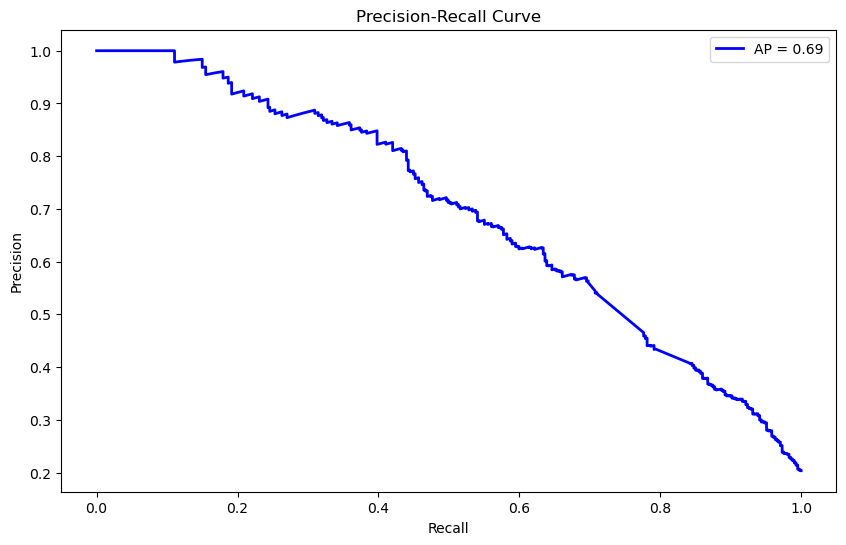

In [111]:
y_pred_proba = model4.predict(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

model4_average_precision = average_precision_score(y_test, y_pred_proba)

plt.plot(recall, precision, color='blue', lw=2, label=f'AP = {model4_average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

In [112]:
y_pred = model4.predict(X_test) > 0.5
model4_AP = average_precision_score(y_test, y_pred)
model4_precision = precision_score(y_test, y_pred)
model4_recall = recall_score(y_test, y_pred)

### Add Early Stop

In [113]:
from tensorflow.keras.callbacks import EarlyStopping

#### Monitor the "val_loss" as metric

In [114]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [115]:
model5 = Sequential()

model5.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model5.add(Dense(18, activation="relu"))
model5.add(Dense(9, activation="relu"))
model5.add(Dense(1, activation="sigmoid"))


opt=Adam(learning_rate = learning_rate)
model5.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [116]:
model5.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=500,
    class_weight=class_weights_dict,
    callbacks=[early_stop],
    verbose = 1
)

Epoch 1/500
100/100 [==============================] - 0s 3ms/step - loss: 0.6456 - recall: 0.5537 - val_loss: 0.6619 - val_recall: 0.7423
Epoch 2/500
100/100 [==============================] - 0s 949us/step - loss: 0.5954 - recall: 0.7002 - val_loss: 0.5920 - val_recall: 0.7117
Epoch 3/500
100/100 [==============================] - 0s 978us/step - loss: 0.5620 - recall: 0.7216 - val_loss: 0.4786 - val_recall: 0.5767
Epoch 4/500
100/100 [==============================] - 0s 897us/step - loss: 0.5380 - recall: 0.7232 - val_loss: 0.5765 - val_recall: 0.8006
Epoch 5/500
100/100 [==============================] - 0s 979us/step - loss: 0.5178 - recall: 0.7439 - val_loss: 0.4597 - val_recall: 0.6994
Epoch 6/500
100/100 [==============================] - 0s 955us/step - loss: 0.4964 - recall: 0.7546 - val_loss: 0.5828 - val_recall: 0.8528
Epoch 7/500
100/100 [==============================] - 0s 979us/step - loss: 0.4882 - recall: 0.7462 - val_loss: 0.4335 - val_recall: 0.6871
Epoch 8/500
100

In [117]:
loss5_df = pd.DataFrame(model5.history.history)
loss5_df.head()

,loss,recall,val_loss,val_recall
0,0.65,0.55,0.66,0.74
1,0.60,0.70,0.59,0.71
2,0.56,0.72,0.48,0.58
3,0.54,0.72,0.58,0.80
4,0.52,0.74,0.46,0.70


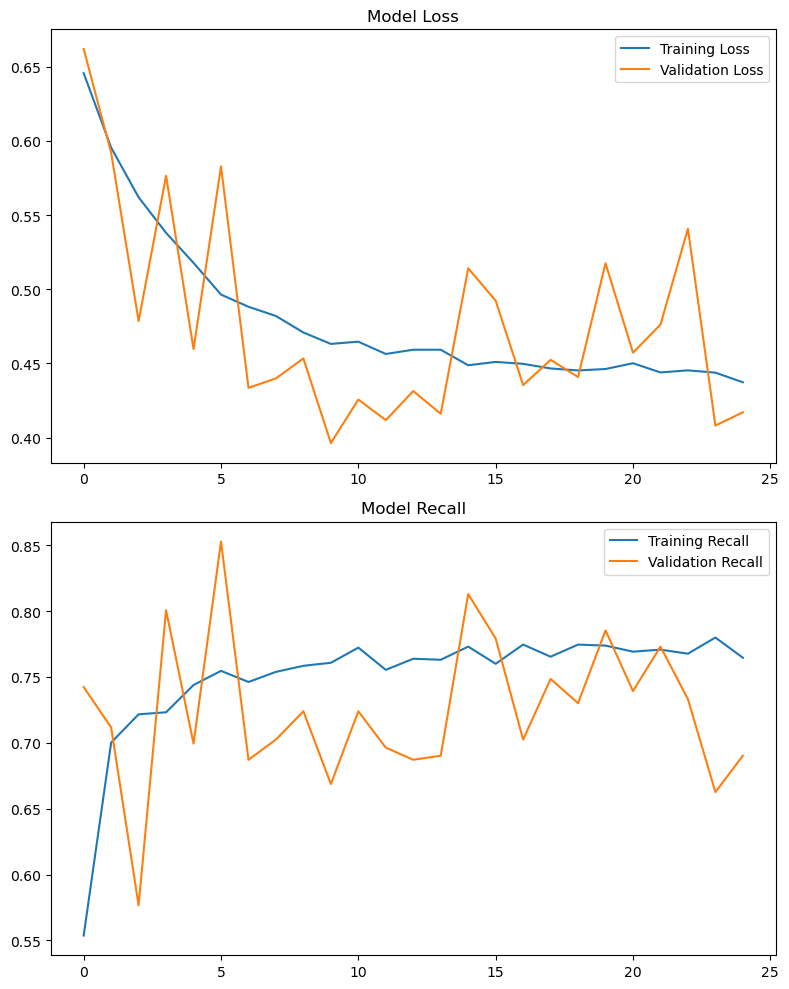

In [118]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Plot loss
axes[0].plot(loss5_df["loss"], label="Training Loss")
axes[0].plot(loss5_df["val_loss"], label="Validation Loss")
axes[0].set_title("Model Loss")
axes[0].legend()

# Plot accuracy
axes[1].plot(loss5_df["recall"], label="Training Recall")
axes[1].plot(loss5_df["val_recall"], label="Validation Recall")
axes[1].set_title("Model Recall")
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

In [119]:
loss, recall = model5.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.3945764899253845
recall:  0.6683046817779541


In [120]:
y_pred = model5.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1359  234]
 [ 135  272]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1593
           1       0.54      0.67      0.60       407

    accuracy                           0.82      2000
   macro avg       0.72      0.76      0.74      2000
weighted avg       0.83      0.82      0.82      2000



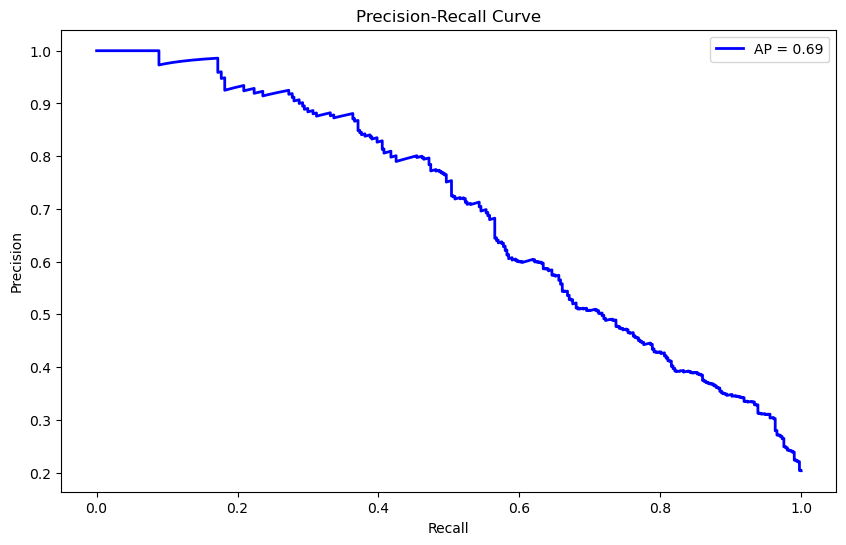

In [121]:
y_pred_proba = model5.predict(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

average_precision = average_precision_score(y_test, y_pred_proba)

plt.plot(recall, precision, color='blue', lw=2, label=f'AP = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

In [122]:
y_pred = model5.predict(X_test) > 0.5
model5_AP = average_precision_score(y_test, y_pred)
model5_precision = precision_score(y_test, y_pred)
model5_recall = recall_score(y_test, y_pred)

#### Monitor the "val_recall" as metric

In [123]:
early_stop = EarlyStopping(
    monitor="val_recall", mode="max", verbose=1, patience=15, restore_best_weights=True
)

In [124]:
model6 = Sequential()

model6.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model6.add(Dense(18, activation="relu"))
model6.add(Dense(9, activation="relu"))
model6.add(Dense(1, activation="sigmoid"))

opt=Adam(learning_rate = learning_rate)
model6.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [125]:
model6.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=500,
    class_weight=class_weights_dict,
    callbacks=[early_stop],
    verbose = 1
)

Epoch 1/500
100/100 [==============================] - 0s 3ms/step - loss: 0.6441 - recall: 0.5882 - val_loss: 0.5768 - val_recall: 0.5859
Epoch 2/500
100/100 [==============================] - 0s 1ms/step - loss: 0.5948 - recall: 0.6933 - val_loss: 0.5799 - val_recall: 0.7147
Epoch 3/500
100/100 [==============================] - 0s 950us/step - loss: 0.5680 - recall: 0.6986 - val_loss: 0.6546 - val_recall: 0.8190
Epoch 4/500
100/100 [==============================] - 0s 954us/step - loss: 0.5403 - recall: 0.7124 - val_loss: 0.5556 - val_recall: 0.7485
Epoch 5/500
100/100 [==============================] - 0s 939us/step - loss: 0.5154 - recall: 0.7416 - val_loss: 0.4931 - val_recall: 0.7147
Epoch 6/500
100/100 [==============================] - 0s 948us/step - loss: 0.5029 - recall: 0.7584 - val_loss: 0.5746 - val_recall: 0.8067
Epoch 7/500
100/100 [==============================] - 0s 949us/step - loss: 0.4917 - recall: 0.7623 - val_loss: 0.4553 - val_recall: 0.7055
Epoch 8/500
100/1

In [127]:
loss6_df = pd.DataFrame(model6.history.history)
loss6_df.head()

,loss,recall,val_loss,val_recall
0,0.64,0.59,0.58,0.59
1,0.59,0.69,0.58,0.71
2,0.57,0.70,0.65,0.82
3,0.54,0.71,0.56,0.75
4,0.52,0.74,0.49,0.71


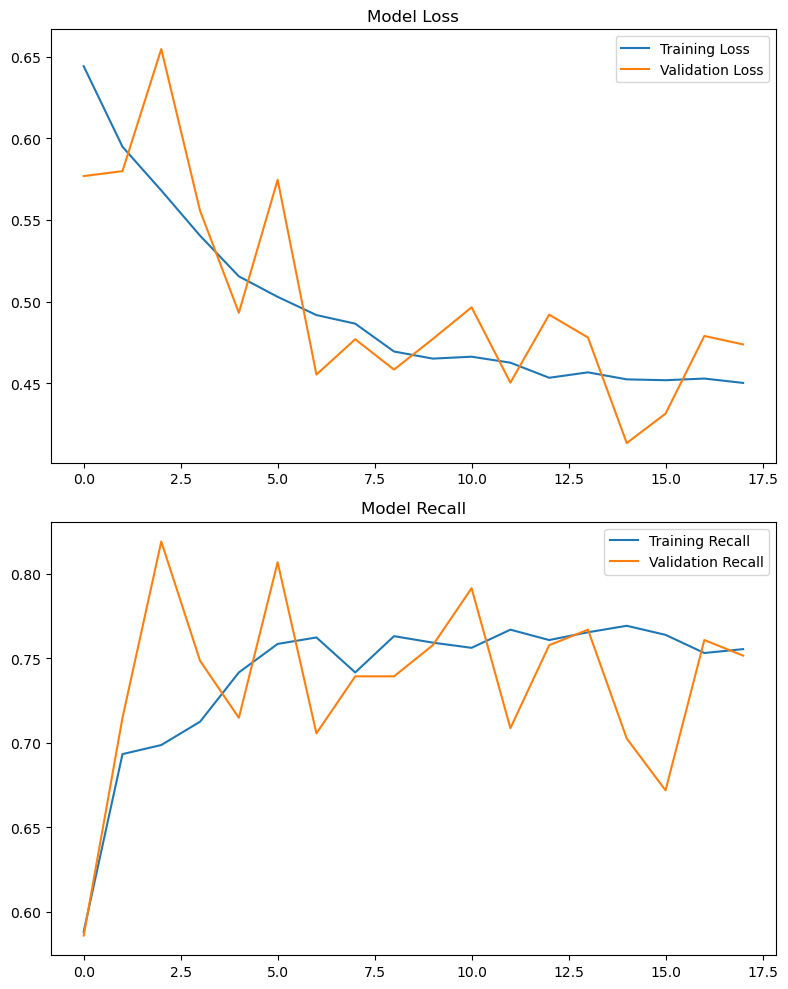

In [128]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Plot loss
axes[0].plot(loss6_df["loss"], label="Training Loss")
axes[0].plot(loss6_df["val_loss"], label="Validation Loss")
axes[0].set_title("Model Loss")
axes[0].legend()

# Plot accuracy
axes[1].plot(loss6_df["recall"], label="Training Recall")
axes[1].plot(loss6_df["val_recall"], label="Validation Recall")
axes[1].set_title("Model Recall")
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

In [129]:
loss, recall = model6.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.654466450214386
recall:  0.8353808522224426


In [130]:
y_pred = model6.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[931 662]
 [ 67 340]]
              precision    recall  f1-score   support

           0       0.93      0.58      0.72      1593
           1       0.34      0.84      0.48       407

    accuracy                           0.64      2000
   macro avg       0.64      0.71      0.60      2000
weighted avg       0.81      0.64      0.67      2000



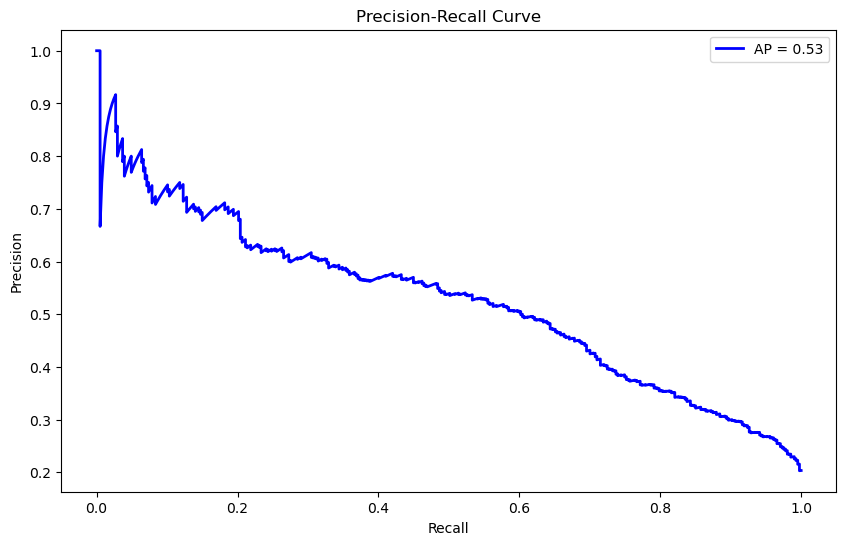

In [131]:
y_pred_proba = model6.predict(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

average_precision = average_precision_score(y_test, y_pred_proba)

plt.plot(recall, precision, color='blue', lw=2, label=f'AP = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

In [132]:
y_pred = model6.predict(X_test) > 0.5
model6_AP = average_precision_score(y_test, y_pred)
model6_precision = precision_score(y_test, y_pred)
model6_recall = recall_score(y_test, y_pred)

## Optuna

In [133]:
!pip install optuna

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/380.1 kB ? eta -:--:--
   --------------------------------------  378.9/380.1 kB 11.9 MB/s eta 0:00:01
   ---------------------------------------- 380.1/380.1 kB 7.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/233.0 kB ? eta -:--:--
   --------------------------------------- 233.0/233.0 kB 13.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   -------- ------------------------------- 0.4/2.1 MB 13.2 MB/s eta 0:00:01
   ------------- -------------------------- 0.7/2.1 MB 7.4 MB/s eta 0:00:01
   ----------------------- ---------------- 1.2/2.1 MB 8.8 MB/s eta 0:00:01
   ---------------------------------------  2.1/2.1 MB 12.1 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 11.1 MB/s eta 0:00:00
   -----------

In [134]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [135]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [136]:
trial_metric = "Recall"
batch_size = 64


def create_model(trial): # the part where the metric ranges in the compile part of the model are determined and the model is built
    # Some hyperparameters we want to optimize #
    n_units1 = trial.suggest_int("n_units1", 2, 128) # number of neurons
    n_units2 = trial.suggest_int("n_units2", 2, 128)
    n_units3 = trial.suggest_int("n_units3", 2, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu")) # hidden layer
    model.add(Dense(n_units3, activation="relu"))
    model.add(Dense(1, activation="sigmoid")) # output.
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial): # contains fit
    model = create_model(trial) # called the created model.
    w0 = trial.suggest_loguniform("w0", 0.01, 5) # class_weight
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [137]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2024-07-22 09:17:54,264] A new study created in memory with name: no-name-b47247f0-a1cd-473b-90c5-83748da5616a


Restoring model weights from the end of the best epoch.
Epoch 00016: early stopping


[I 2024-07-22 09:17:56,650] Trial 0 finished with value: 0.004914004821330309 and parameters: {'n_units1': 65, 'n_units2': 83, 'n_units3': 12, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'learning_rate': 1.880551340709371e-05, 'w0': 0.2811607252706686, 'w1': 3.061974855233343}. Best is trial 0 with value: 0.004914004821330309.


Restoring model weights from the end of the best epoch.
Epoch 00036: early stopping


[I 2024-07-22 09:18:01,055] Trial 1 finished with value: 0.8427518606185913 and parameters: {'n_units1': 66, 'n_units2': 29, 'n_units3': 25, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.0011541618299875929, 'w0': 0.09609810640792242, 'w1': 1.1484059939872033}. Best is trial 1 with value: 0.8427518606185913.


Restoring model weights from the end of the best epoch.
Epoch 00026: early stopping


[I 2024-07-22 09:18:04,060] Trial 2 finished with value: 0.0 and parameters: {'n_units1': 60, 'n_units2': 77, 'n_units3': 21, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 1.9131798238644692e-05, 'w0': 1.184784218133064, 'w1': 0.5766163978318704}. Best is trial 1 with value: 0.8427518606185913.


Restoring model weights from the end of the best epoch.
Epoch 00026: early stopping


[I 2024-07-22 09:18:07,231] Trial 3 finished with value: 0.0 and parameters: {'n_units1': 50, 'n_units2': 15, 'n_units3': 66, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.nadam.Nadam'>, 'learning_rate': 1.7008372183934578e-05, 'w0': 0.20921500425821973, 'w1': 0.03743970866077379}. Best is trial 1 with value: 0.8427518606185913.


Restoring model weights from the end of the best epoch.
Epoch 00029: early stopping


[I 2024-07-22 09:18:10,683] Trial 4 finished with value: 0.15233415365219116 and parameters: {'n_units1': 121, 'n_units2': 65, 'n_units3': 54, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.004271461568795857, 'w0': 0.7725133301160978, 'w1': 0.02065805398024822}. Best is trial 1 with value: 0.8427518606185913.


Restoring model weights from the end of the best epoch.
Epoch 00046: early stopping


[I 2024-07-22 09:18:16,292] Trial 5 finished with value: 0.20884521305561066 and parameters: {'n_units1': 11, 'n_units2': 34, 'n_units3': 94, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.0010206517746101274, 'w0': 3.4217752934507004, 'w1': 0.5470521430186889}. Best is trial 1 with value: 0.8427518606185913.


Restoring model weights from the end of the best epoch.
Epoch 00041: early stopping


[I 2024-07-22 09:18:20,483] Trial 6 finished with value: 0.24815724790096283 and parameters: {'n_units1': 35, 'n_units2': 120, 'n_units3': 28, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.0012594381384314081, 'w0': 2.9318511703722594, 'w1': 0.3438354975940044}. Best is trial 1 with value: 0.8427518606185913.


Restoring model weights from the end of the best epoch.
Epoch 00066: early stopping


[I 2024-07-22 09:18:27,276] Trial 7 finished with value: 0.8673218488693237 and parameters: {'n_units1': 119, 'n_units2': 42, 'n_units3': 93, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'learning_rate': 0.00011900966096475078, 'w0': 0.22456912949432822, 'w1': 1.9236960206520426}. Best is trial 7 with value: 0.8673218488693237.


Restoring model weights from the end of the best epoch.
Epoch 00016: early stopping


[I 2024-07-22 09:18:29,594] Trial 8 finished with value: 0.9459459185600281 and parameters: {'n_units1': 117, 'n_units2': 119, 'n_units3': 21, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 1.6299463438277267e-05, 'w0': 0.015739068390120046, 'w1': 2.4341828182844685}. Best is trial 8 with value: 0.9459459185600281.


Restoring model weights from the end of the best epoch.
Epoch 00033: early stopping


[I 2024-07-22 09:18:33,910] Trial 9 finished with value: 0.39557740092277527 and parameters: {'n_units1': 56, 'n_units2': 81, 'n_units3': 50, 'optimizer': <class 'tensorflow.python.keras.optimizer_v2.adam.Adam'>, 'learning_rate': 0.031159448042428785, 'w0': 0.01591503922599931, 'w1': 0.02223197114321676}. Best is trial 8 with value: 0.9459459185600281.


{'n_units1': 117,
 'n_units2': 119,
 'n_units3': 21,
 'optimizer': tensorflow.python.keras.optimizer_v2.adadelta.Adadelta,
 'learning_rate': 1.6299463438277267e-05,
 'w0': 0.015739068390120046,
 'w1': 2.4341828182844685}

In [138]:
unit1, unit2, unit3, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model7 = Sequential()

model7.add(Dense(unit1, activation="relu", input_dim=X_train.shape[1]))
model7.add(Dense(unit2, activation="relu"))
model7.add(Dense(unit3, activation="relu"))
model7.add(Dense(1, activation="sigmoid"))

opt = optimizer(learning_rate=lr)
model7.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

model7.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=500,
    callbacks=[early_stop],
    class_weight={0: w0, 1: w1},
    verbose=1,
)

Epoch 1/500
100/100 [==============================] - 0s 3ms/step - loss: 0.3279 - recall: 0.9877 - val_loss: 0.7325 - val_recall: 0.9847
Epoch 2/500
100/100 [==============================] - 0s 1ms/step - loss: 0.3279 - recall: 0.9885 - val_loss: 0.7326 - val_recall: 0.9847
Epoch 3/500
100/100 [==============================] - 0s 1ms/step - loss: 0.3278 - recall: 0.9885 - val_loss: 0.7327 - val_recall: 0.9847
Epoch 4/500
100/100 [==============================] - 0s 1ms/step - loss: 0.3278 - recall: 0.9885 - val_loss: 0.7327 - val_recall: 0.9847
Epoch 5/500
100/100 [==============================] - 0s 1ms/step - loss: 0.3278 - recall: 0.9893 - val_loss: 0.7328 - val_recall: 0.9847
Epoch 6/500
100/100 [==============================] - 0s 1ms/step - loss: 0.3277 - recall: 0.9893 - val_loss: 0.7328 - val_recall: 0.9847
Epoch 7/500
100/100 [==============================] - 0s 1ms/step - loss: 0.3277 - recall: 0.9900 - val_loss: 0.7329 - val_recall: 0.9847
Epoch 8/500
100/100 [======

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [139]:
loss7_df = pd.DataFrame(model7.history.history)
loss7_df.head()

,loss,recall,val_loss,val_recall
0,0.33,0.99,0.73,0.98
1,0.33,0.99,0.73,0.98
2,0.33,0.99,0.73,0.98
3,0.33,0.99,0.73,0.98
4,0.33,0.99,0.73,0.98


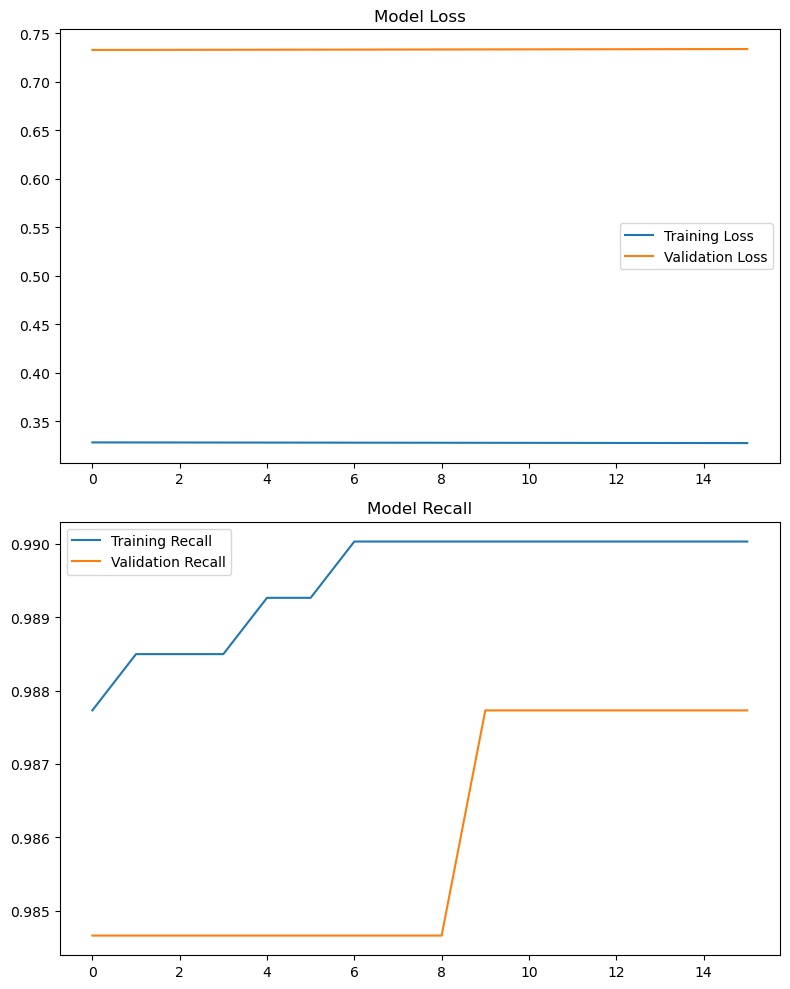

In [140]:
# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Plot loss
axes[0].plot(loss7_df["loss"], label="Training Loss")
axes[0].plot(loss7_df["val_loss"], label="Validation Loss")
axes[0].set_title("Model Loss")
axes[0].legend()

# Plot accuracy
axes[1].plot(loss7_df["recall"], label="Training Recall")
axes[1].plot(loss7_df["val_recall"], label="Validation Recall")
axes[1].set_title("Model Recall")
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

In [141]:
loss, recall = model7.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.7332996726036072
recall:  0.9950860142707825


In [142]:
y_pred = model7.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   7 1586]
 [   2  405]]
              precision    recall  f1-score   support

           0       0.78      0.00      0.01      1593
           1       0.20      1.00      0.34       407

    accuracy                           0.21      2000
   macro avg       0.49      0.50      0.17      2000
weighted avg       0.66      0.21      0.08      2000



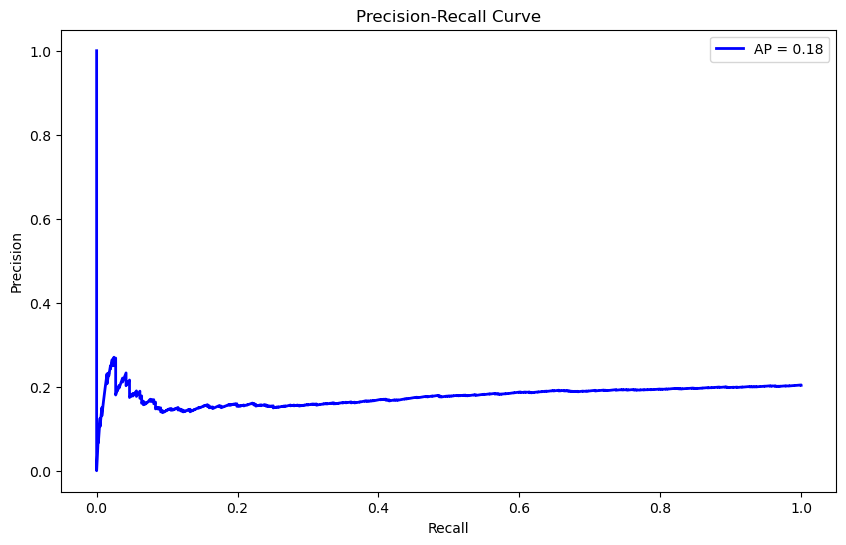

In [143]:
y_pred_proba = model7.predict(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

average_precision = average_precision_score(y_test, y_pred_proba)

plt.plot(recall, precision, color='blue', lw=2, label=f'AP = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

In [144]:
y_pred = model7.predict(X_test) > 0.5
model7_AP = average_precision_score(y_test, y_pred)
model7_precision = precision_score(y_test, y_pred)
model7_recall = recall_score(y_test, y_pred)

In [145]:
print(model_recall, model2_recall, model3_recall, model4_recall,
                                  model5_recall, model6_recall, model7_recall)

0.538083538083538 0.7444717444717445 0.6142506142506142 0.7788697788697788 0.6683046683046683 0.8353808353808354 0.995085995085995


# Final Model and Model Deployment

In [146]:
compare= pd.DataFrame({"Methods": ["Non Class-weight", "Class-weight",  "Class-weight,learning_rate",
                                 "Class-weight,learning_rate,dropout","Class-weight,Learning_rate,Earlystop-val_loss",
                                   "Class-weight,Learning_rate,Earlystop-val_recall","Optuna"],
                       "Precision": [model_precision, model2_precision, model3_precision, model4_precision,
                                     model5_precision, model6_precision, model7_precision],
                       "Recall": [model_recall, model2_recall, model3_recall, model4_recall,
                                  model5_recall, model6_recall, model7_recall],
                       "AP": [model_AP, model2_AP, model3_AP, model4_AP,
                              model5_AP,model6_AP,model7_AP]})

compare

,Methods,Precision,Recall,AP
0,Non Class-weight,0.65,0.54,0.44
1,Class-weight,0.45,0.74,0.38
2,"Class-weight,learning_rate",0.45,0.61,0.36
3,"Class-weight,learning_rate,dropout",0.46,0.78,0.40
4,"Class-weight,Learning_rate,Earlystop-val_loss",0.54,0.67,0.43
5,"Class-weight,Learning_rate,Earlystop-val_recall",0.34,0.84,0.32
6,Optuna,0.20,1.00,0.20


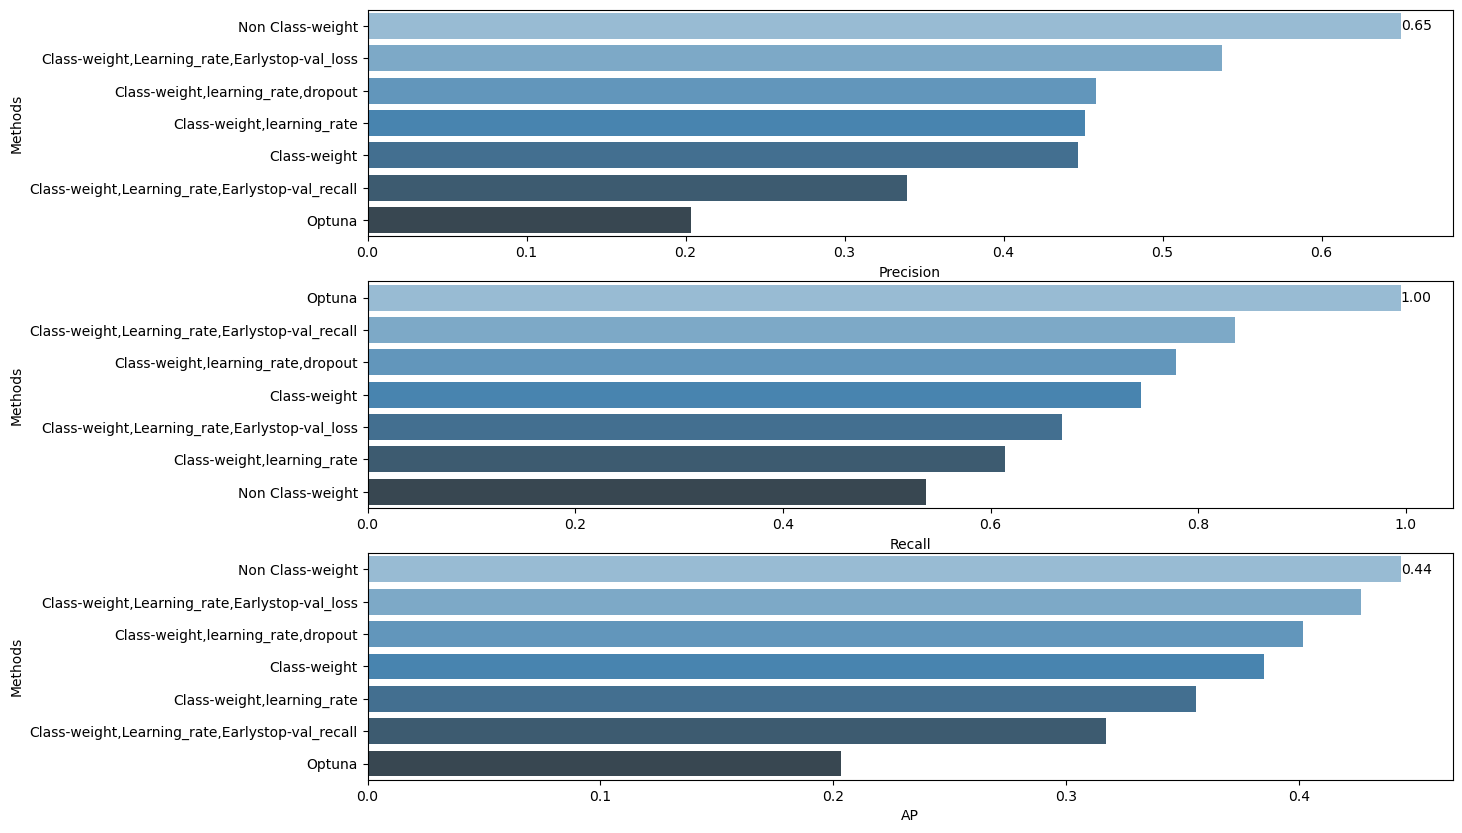

In [147]:
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="Precision", ascending=False)
ax=sns.barplot(x="Precision", y="Methods", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.2f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Methods", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.2f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Methods", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.2f")
plt.show();

In [149]:
compare['Average'] = compare[['Precision', 'Recall', 'AP']].mean(axis=1)

# Örnek değerlendirme sonucunu yazdırma
best_method = compare.loc[compare['Average'].idxmax()]
print(f"En verimli model: {best_method['Methods']} \nOrtalama Skor: {best_method['Average']:.2f}")


En verimli model: Class-weight,learning_rate,dropout 
Ortalama Skor: 0.55


Conclusion
Based on the provided results, the class-weight method combined with learning rate and dropout should be chosen as it provides a balanced performance across precision, recall, and f1-score.

Saving Final Model and Scaler

In [150]:
import pickle

pickle.dump(scaler, open("scaler_churn_final", "wb"))

In [151]:
y_pred = model4.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1218  375]
 [  90  317]]
              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1593
           1       0.46      0.78      0.58       407

    accuracy                           0.77      2000
   macro avg       0.69      0.77      0.71      2000
weighted avg       0.83      0.77      0.79      2000



In [152]:
y_pred = model5.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1359  234]
 [ 135  272]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1593
           1       0.54      0.67      0.60       407

    accuracy                           0.82      2000
   macro avg       0.72      0.76      0.74      2000
weighted avg       0.83      0.82      0.82      2000



In [155]:
model4.save("final_model.h4")

INFO:tensorflow:Assets written to: final_model.h4\assets


In [156]:
model5.save("final_model.h5")

Loading Model and Scaler

In [157]:
from tensorflow.keras.models import load_model
import pickle

In [179]:
final_model = load_model("final_model.h4")
scaler = pickle.load(open("scaler_churn_final", "rb"))

In [180]:
final_model_1 = load_model("final_model.h5")
scaler_1 = pickle.load(open("scaler_churn_final", "rb"))

## Prediction

In [181]:
single_churn = df.drop("Exited", axis=1).iloc[11:12, :]
single_churn

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
11,497,24,3,0.00,2,1,0,76390.01,False,False,True,False,True


In [182]:
single_churn = scaler.transform(single_churn)
single_churn

array([[0.294     , 0.08108108, 0.3       , 0.        , 0.33333333,
        1.        , 0.        , 0.38168594, 0.        , 0.        ,
        1.        , 0.        , 1.        ]])

In [183]:
(final_model.predict(single_churn) > 0.5).astype("int32")

array([[0]])

In [184]:
final_model.predict(single_churn)

array([[0.01517597]], dtype=float32)

In [185]:
df["Exited"].iloc[11]

0

In [189]:
single_churn_1 = scaler_1.transform(single_churn)
single_churn_1

array([[-6.99412000e-01, -2.42147553e-01,  3.00000000e-02,
         0.00000000e+00, -2.22222222e-01,  1.00000000e+00,
         0.00000000e+00, -4.48660494e-04,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [190]:
(final_model_1.predict(single_churn) > 0.5).astype("int32")

array([[0]])

In [191]:
final_model_1.predict(single_churn)

array([[0.03312564]], dtype=float32)

In [192]:
df["Exited"].iloc[11]

0

In [193]:
random_ten_customer = df.sample(n=10, random_state=101).iloc[0:10, :11]

random_ten_customer.drop(columns = 'Exited', axis = 1, inplace = True)
random_ten_customer

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany
6676,619,52,8,0.00,2,1,1,123242.11,False,False
6421,616,23,8,73112.95,1,1,1,62733.05,True,False
9834,516,46,6,62212.29,1,0,1,171681.86,True,False
8492,494,28,9,114731.76,2,0,1,79479.74,True,False
9982,655,46,7,137145.12,1,1,0,115146.40,False,True
8844,695,35,7,0.00,2,1,0,160387.98,False,False
7247,582,40,3,110150.43,1,1,1,191757.65,False,True
5862,682,40,4,0.00,2,1,1,140745.91,True,False
3662,632,28,5,118890.81,1,0,1,145157.97,True,False
3457,657,36,8,188241.05,2,0,0,183058.51,False,False


In [205]:
random_ten_customers = scaler.fit_transform(random_ten_customer)
random_ten_customers

array([[0.62189055, 1.        , 0.83333333, 0.        , 1.        ,
        1.        , 1.        , 0.46897305, 0.        , 0.        ],
       [0.60696517, 0.        , 0.83333333, 0.38840067, 0.        ,
        1.        , 1.        , 0.        , 1.        , 0.        ],
       [0.10945274, 0.79310345, 0.5       , 0.33049268, 0.        ,
        0.        , 1.        , 0.84440339, 1.        , 0.        ],
       [0.        , 0.17241379, 1.        , 0.60949384, 1.        ,
        0.        , 1.        , 0.12979455, 1.        , 0.        ],
       [0.80099502, 0.79310345, 0.66666667, 0.72856117, 0.        ,
        1.        , 0.        , 0.40622757, 0.        , 1.        ],
       [1.        , 0.4137931 , 0.66666667, 0.        , 1.        ,
        1.        , 0.        , 0.75687063, 0.        , 0.        ],
       [0.43781095, 0.5862069 , 0.        , 0.58515627, 0.        ,
        1.        , 1.        , 1.        , 0.        , 1.        ],
       [0.93532338, 0.5862069 , 0.1666666

In [209]:
if random_ten_customers.shape[1] != 13:
    # Assuming you want to pad or add features
    # Example: pad with zeros (or other suitable strategy)
    padded_customers = np.pad(random_ten_customers, ((0, 0), (0, 13 - random_ten_customers.shape[1])), mode='constant')
    random_ten_customers = padded_customers

In [210]:
# Make predictions
predictions = final_model.predict(random_ten_customers)

# Convert predictions to binary class labels
binary_predictions = (predictions > 0.5).astype(np.int64)

# Create DataFrame
prediction_df = pd.DataFrame(binary_predictions, columns=['prediction'])

# Display DataFrame
print(prediction_df)

   prediction
0           1
1           0
2           1
3           1
4           1
5           1
6           1
7           1
8           0
9           1


In [211]:
actual = pd.DataFrame(df.sample(n=10, random_state=101)['Exited']).rename({'Exited': 'actual'}, axis=1).astype("float64")
actual

,actual
6676,0.00
6421,0.00
9834,1.00
8492,0.00
9982,1.00
8844,0.00
7247,1.00
5862,0.00
3662,0.00
3457,1.00


In [213]:
pred_df = actual.join(prediction_df.set_index(actual.index))

pred_df

,actual,prediction
6676,0.00,1
6421,0.00,0
9834,1.00,1
8492,0.00,1
9982,1.00,1
8844,0.00,1
7247,1.00,1
5862,0.00,1
3662,0.00,0
3457,1.00,1


In [214]:
pred_df['prediction_accuracy'] = pred_df.apply(lambda x: "TRUE" if int(x['actual'] == x['prediction']) else "FALSE", axis=1)

pred_df

,actual,prediction,prediction_accuracy
6676,0.00,1,FALSE
6421,0.00,0,TRUE
9834,1.00,1,TRUE
8492,0.00,1,FALSE
9982,1.00,1,TRUE
8844,0.00,1,FALSE
7247,1.00,1,TRUE
5862,0.00,1,FALSE
3662,0.00,0,TRUE
3457,1.00,1,TRUE


with model5

In [215]:
random_ten_customers_1 = scaler_1.fit_transform(random_ten_customer)
random_ten_customers_1

array([[0.62189055, 1.        , 0.83333333, 0.        , 1.        ,
        1.        , 1.        , 0.46897305, 0.        , 0.        ],
       [0.60696517, 0.        , 0.83333333, 0.38840067, 0.        ,
        1.        , 1.        , 0.        , 1.        , 0.        ],
       [0.10945274, 0.79310345, 0.5       , 0.33049268, 0.        ,
        0.        , 1.        , 0.84440339, 1.        , 0.        ],
       [0.        , 0.17241379, 1.        , 0.60949384, 1.        ,
        0.        , 1.        , 0.12979455, 1.        , 0.        ],
       [0.80099502, 0.79310345, 0.66666667, 0.72856117, 0.        ,
        1.        , 0.        , 0.40622757, 0.        , 1.        ],
       [1.        , 0.4137931 , 0.66666667, 0.        , 1.        ,
        1.        , 0.        , 0.75687063, 0.        , 0.        ],
       [0.43781095, 0.5862069 , 0.        , 0.58515627, 0.        ,
        1.        , 1.        , 1.        , 0.        , 1.        ],
       [0.93532338, 0.5862069 , 0.1666666

In [219]:
if random_ten_customers_1.shape[1] != 13:
    # Assuming you want to pad or add features
    # Example: pad with zeros (or other suitable strategy)
    padded_customers_1 = np.pad(random_ten_customers_1, ((0, 0), (0, 13 - random_ten_customers_1.shape[1])), mode='constant')
    random_ten_customers_1 = padded_customers_1

In [220]:
# Make predictions
predictions_1 = final_model_1.predict(random_ten_customers_1)

# Convert predictions to binary class labels
binary_predictions_1 = (predictions_1 > 0.5).astype(np.int64)

# Create DataFrame
prediction_df_1 = pd.DataFrame(binary_predictions_1, columns=['prediction'])

# Display DataFrame
print(prediction_df_1)

   prediction
0           1
1           0
2           0
3           1
4           1
5           1
6           0
7           1
8           0
9           1


In [222]:
pred_df_1 = actual.join(prediction_df_1.set_index(actual.index))

pred_df_1

,actual,prediction
6676,0.00,1
6421,0.00,0
9834,1.00,0
8492,0.00,1
9982,1.00,1
8844,0.00,1
7247,1.00,0
5862,0.00,1
3662,0.00,0
3457,1.00,1


In [223]:
pred_df_1['prediction_accuracy'] = pred_df_1.apply(lambda x: "TRUE" if int(x['actual'] == x['prediction']) else "FALSE", axis=1)

pred_df_1

,actual,prediction,prediction_accuracy
6676,0.00,1,FALSE
6421,0.00,0,TRUE
9834,1.00,0,FALSE
8492,0.00,1,FALSE
9982,1.00,1,TRUE
8844,0.00,1,FALSE
7247,1.00,0,FALSE
5862,0.00,1,FALSE
3662,0.00,0,TRUE
3457,1.00,1,TRUE


Comparing the predictions of model5 and model4, model4 provides better predictions. 

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___